In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmap

import timeit
import subprocess as subp

FGsize = (6,6)

<IPython.core.display.Javascript object>


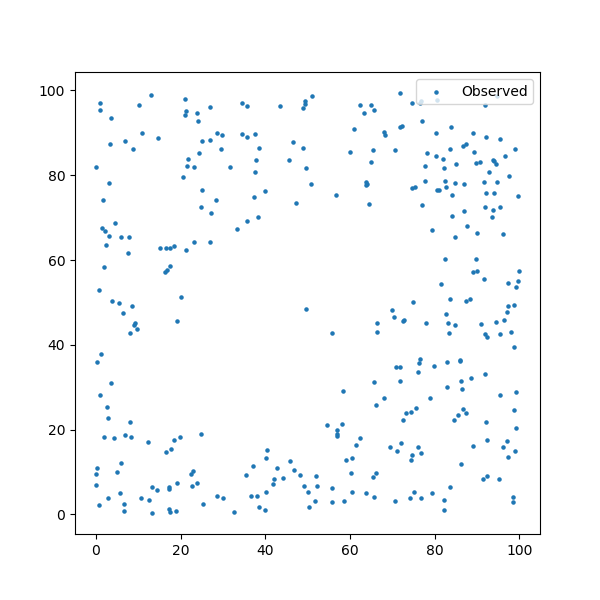

In [2]:
OC = np.loadtxt("observed_catalogs/oc.dat")

# z cut
Z_c = [50]

Xo = OC[:,0]
Yo = OC[:,1]
Zo = OC[:,2]

for z in Z_c:
    index = np.where( abs(Zo-z) < 5 )

    fig = plt.figure(figsize=FGsize)
    plt.scatter(Xo[index], Yo[index], s=5, label="Observed")
    plt.legend(loc="upper right")

# Nothing Here

<IPython.core.display.Javascript object>


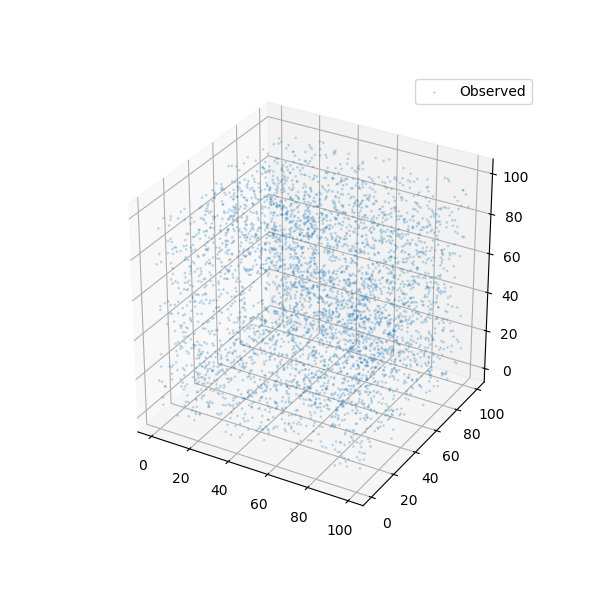

In [3]:
fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xo,Yo,Zo, s=1, alpha=0.2, label="Observed")

ax.set_aspect(1)
ax.legend(loc=1)

<IPython.core.display.Javascript object>


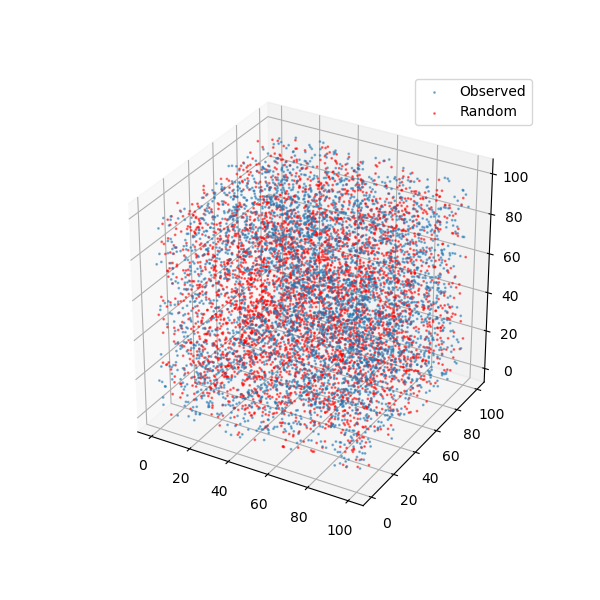

In [4]:
def gen_random():
    L = 100
    x = np.random.rand() * L
    y = np.random.rand() * L
    z = np.random.rand() * L
    
    return [x,y,z]

np.random.seed(0)
RC = []
for i in range(OC.shape[0]):
    RC.append(gen_random())   
RC = np.array(RC)
np.savetxt( "random_catalogs/1.cat", RC)

Xr = RC[:,0]
Yr = RC[:,1]
Zr = RC[:,2]



fig = plt.figure(figsize=FGsize)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Xo,Yo,Zo, s=1, alpha=0.5, label="Observed")
ax.scatter(Xr,Yr,Zr, s=1, c="r", alpha=0.5, label="Random")

ax.set_aspect(1)
ax.legend(loc=0)

<IPython.core.display.Javascript object>


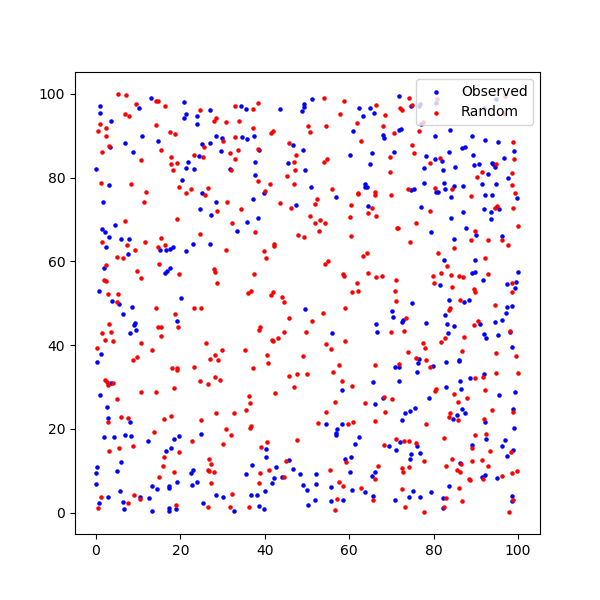

(8366, 3)
(4183, 3)


In [5]:
def SCATTER_3d( cat1 , *args):    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]     
        
    

    fig = plt.figure(figsize=FGsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect(1)
    
    ax.scatter(X1, Y1, Z1, s=5, c="b", alpha=0.2)
    if(len(args)>=1):
        ax.scatter(X2, Y2, Z2, s=5, c="r", alpha=0.2)
    if(len(args)>=2):
        ax.scatter(X3, Y3, Z3, s=15, c="b", alpha=1)
        
def PLOT_SLICE_OF_CAT( cat1 , *args):
    
    slice_tickness = 10

    Z_c = [50]
    
    X1 = cat1[:,0]
    Y1 = cat1[:,1]
    Z1 = cat1[:,2]

    if(len(args)>=1):
        cat2 = args[0]
        X2 = cat2[:,0]
        Y2 = cat2[:,1]
        Z2 = cat2[:,2]

    if(len(args)>=2):
        cat3 = args[1]
        X3 = cat3[:,0]
        Y3 = cat3[:,1]
        Z3 = cat3[:,2]        

    for z in Z_c:
        fig = plt.figure(figsize=FGsize)
        
        index_1 = np.where( abs(Z1-z) < slice_tickness )
        plt.scatter(X1[index_1],  Y1[index_1], s=1, c="b")
        
        if(len(args)>=1):        
            index_2 = np.where( abs(Z2-z) < slice_tickness )
            plt.scatter(X2[index_2],  Y2[index_2], s=1, c="r")        

        if(len(args)>=2):        
            index_3 = np.where( abs(Z3-z) < slice_tickness )
            plt.scatter(X3[index_3],  Y3[index_3], s=15, c="g")        

            

slice_tickness = 5
Z_c = [50]


for z in Z_c:
    fig = plt.figure(figsize=FGsize)
    index_1 = np.where( abs(Zo-z) < slice_tickness)
    index_2 = np.where( abs(Zr-z) < slice_tickness)
    
    plt.scatter( Xo[index_1], Yo[index_1], s = 5, c="blue", label="Observed")
    plt.scatter( Xr[index_2], Yr[index_2], s = 5, c="red", label="Random")
    
    
    plt.legend(loc=1)


FC = np.vstack([RC,OC])

print(FC.shape)
print(RC.shape)
np.savetxt("full_catalogs/1.cat", FC)            

    subp.run("LSS_BSK_calc -input  " + fc_path + fc_filename +
             " -output " + str(FILENUM) +
             " -beta " + str(BETA) +
             " -printinfo True -numNNB 300"
             , shell=True, check=True)



In [6]:
OC_FILE_IN = "oc.dat"
FILENUM = "1"
BETA = 1.0
nrand = 1.0

prog = "progress.txt"


### Paths
RC_path = "random_catalogs/"
FC_path = "full_catalogs/"
OC_path = "observed_catalogs/"
BS_path = "xdl_beta_skeleton/"
ML_path = "masterlists/"
FG_path = "figures/"
VE_path = "volume_and_excentricity/"

OC_filename = OC_FILE_IN
FC_filename = "{}.cat".format(FILENUM)
RC_filename = "{}.cat".format(FILENUM)
BS_filename = "{}.BSKIndex".format(FILENUM)
ML_filename = "{}.mls".format(FILENUM)
FG_filename = "{}".format(FILENUM)
VE_filename = "{}.vae".format(FILENUM)

beta = BETA
n_rand = nrand

In [7]:
#################################################################
#                                                               #
#                    Void Finder Main Loop                      #
#                                                               #
#################################################################
beta = BETA
n_rand = nrand
toc = timeit.default_timer()
subp.run( "echo  Finding voids in {} >> {}".format(OC_FILE_IN, prog), shell=True, check=True)

InitialMessage  = "\n\n\n #########################################################"
InitialMessage += "\n\n Running with:\n"
InitialMessage += "\n\t n_rand = {}".format(n_rand)
InitialMessage += "\n\t beta   = {}".format(beta)

print(InitialMessage)
print(" Using this files:\n\t{}\n\t{}\n\t{}\n\t{}".format(RC_filename,FC_filename,BS_filename,OC_filename,ML_filename))

RC    = np.loadtxt(RC_path + RC_filename)
OC    = np.loadtxt(OC_path + OC_filename)
FC    = np.loadtxt(FC_path + FC_filename)
BS    = np.loadtxt(BS_path + BS_filename)

N_rnd = RC.shape[0]
N_obs = OC.shape[0]

print(" Reading Full Catalogs and Beta-Skeleton from:\n\t{}\n\t{}".format(FC_filename,BS_filename))
print(" Previous BetaSkeleton Shape before Stacking: ", BS.shape)

### Transforms Xiao-Dong Li's Beta Skeleton Index to long list

a = BS[:,0].astype(int)
a = list(a)
b = BS[:,1].astype(int)
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T





 #########################################################

 Running with:

	 n_rand = 1.0
	 beta   = 1.0
 Using this files:
	1.cat
	1.cat
	1.BSKIndex
	oc.dat
 Reading Full Catalogs and Beta-Skeleton from:
	1.cat
	1.BSKIndex
 Previous BetaSkeleton Shape before Stacking:  (31104, 2)


In [8]:
print("Next BetaSkeleton Shape after Stacking: ", fcBSkel.shape)

### Search for the first N_rnd points in the FC.

# Find RANDOM POINTS in the fcBeta-Skeleton Graph.
first_filter_index = np.where(fcBSkel[:,0] < N_rnd)  
    
# Store the partial Beta-Skeleton Graph of Random Points and
# its connections. They may have connections with Obs. points
# and other Random points.
first_filter_BSkel = np.array(fcBSkel[first_filter_index]).astype(int)

# Find the Random Points connected only to Random Points.

# To do this, first we find those points whom are connected to 
# observational points.
second_filter_index = np.where( first_filter_BSkel[:,1] >= N_rnd )[0]
    
# They are going to be dropped.
particle_ID_to_drop = first_filter_BSkel[second_filter_index,0]
particle_ID_to_drop.sort()
# A set of the Random Points connected to Observational points
# is created, there are not repeated items.
droplist = set(particle_ID_to_drop)

print( "First filter shape:", first_filter_BSkel.shape, 
       "\nHow many of them have direct connections"+
       " with galaxies (i.e. droplist length)", 
       len(droplist),
       "\nThen, must survive", len(set(first_filter_BSkel[:,0])) -len(droplist), 
       "trueVoidPoints")

# We have the Random points set:
# Maybe not all Random Particles are connected to the Skeleton. (large Beta)
# Because of this, we doesn't take into account something like
# Points_in_Skeleton = range(0,N_rnd).


print('Checking Random Points in the Beta Skeleton')
Points_in_Skeleton = set(first_filter_BSkel[:,0])
print('Random Points in Beta Skeleton Checked') 

# and the droplist. The complement(difference) is the
# pure void points set.



Next BetaSkeleton Shape after Stacking:  (62208, 2)
First filter shape: (31363, 2) 
How many of them have direct connections with galaxies (i.e. droplist length) 3811 
Then, must survive 372 trueVoidPoints
Checking Random Points in the Beta Skeleton
Random Points in Beta Skeleton Checked


In [9]:
len(Points_in_Skeleton)

4183

In [10]:
len(droplist)

3811

In [11]:
Points_in_Skeleton.intersection(set([3389]))

{3389}

In [12]:
droplist.intersection(set([3389]))

set()

In [13]:
print('')
trueVoidPointsIndex = Points_in_Skeleton.difference(droplist)
# This set is converted to list, it will be used as an index to find 
# True Voids.
trueVoidPointsIndex = list(trueVoidPointsIndex)
trueVoidPointsIndex.sort()

# This is the first definition of TRUE VOID POINTS.
# Catalog of particles in voids
void_cat = FC[trueVoidPointsIndex]

### True Voids have been foud. #########################################
########################################################################



In [14]:
trueVoidPointsIndex

[15,
 21,
 27,
 35,
 45,
 62,
 65,
 71,
 78,
 81,
 114,
 146,
 150,
 155,
 165,
 166,
 171,
 184,
 194,
 203,
 221,
 223,
 225,
 226,
 227,
 231,
 243,
 244,
 267,
 291,
 296,
 299,
 305,
 312,
 317,
 318,
 321,
 337,
 345,
 370,
 371,
 382,
 398,
 415,
 439,
 448,
 450,
 456,
 467,
 474,
 477,
 480,
 496,
 521,
 523,
 537,
 540,
 547,
 551,
 568,
 595,
 607,
 610,
 617,
 624,
 637,
 641,
 690,
 696,
 704,
 716,
 726,
 756,
 766,
 782,
 786,
 789,
 809,
 819,
 839,
 849,
 856,
 862,
 873,
 880,
 884,
 888,
 921,
 924,
 933,
 951,
 965,
 969,
 975,
 976,
 993,
 1004,
 1007,
 1015,
 1036,
 1085,
 1092,
 1114,
 1119,
 1134,
 1142,
 1144,
 1153,
 1156,
 1162,
 1175,
 1183,
 1186,
 1191,
 1232,
 1235,
 1236,
 1238,
 1239,
 1247,
 1273,
 1275,
 1301,
 1314,
 1333,
 1354,
 1363,
 1390,
 1394,
 1399,
 1400,
 1417,
 1426,
 1427,
 1450,
 1465,
 1475,
 1495,
 1508,
 1510,
 1513,
 1515,
 1534,
 1560,
 1592,
 1598,
 1606,
 1612,
 1620,
 1634,
 1669,
 1677,
 1685,
 1686,
 1698,
 1705,
 1707,
 1720,


In [15]:
oldBoidsBS = np.array(VoidsBS)

NameError: name 'VoidsBS' is not defined

In [16]:
### Looking for the connections of the TrueVoidPoints
    
index=[]
for k in trueVoidPointsIndex:
    #index.extend( list( np.where( (fcBSkel[:,0] == k) &
    #                             (fcBSkel[:,1] > k))[0].astype(int) ) )
    
    index.extend( list( np.where( (fcBSkel[:,0] == k))[0].astype(int) ) )
    
    
    index = list(set(index ) )
    index.sort()
#DEBUG
print(fcBSkel[index])
print(fcBSkel[index].shape)



[[  15  944]
 [  15 3330]
 [  15 2163]
 ...
 [4181 4098]
 [4140 4103]
 [4181 4165]]
(2723, 2)


In [17]:
# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()
    
print(" Void BetaSkeleton Shape: ", VoidsBS.shape)
print(" The len of trueVoidPointsIndex", len(trueVoidPointsIndex))

# This is the MasterList of Voids.

# Each TrueVoidPoint_index is checked.
# If doesn't exists, is identified as a new void (a new sublist is created)
# If it exists already, the point and its connections are added to the existing void sublist.
    



 Void BetaSkeleton Shape:  (2723, 2)
 The len of trueVoidPointsIndex 372


In [18]:
for i in VoidsBS:
    print(i)

[ 15 944]
[  15 3330]
[  15 2163]
[  15 3175]
[ 15 712]
[  21 2205]
[ 21 185]
[  21 3475]
[  21 1043]
[  21 1326]
[ 21 782]
[  21 2345]
[ 21 238]
[  21 2409]
[  27 2456]
[  27 1273]
[  27 1390]
[  27 3052]
[ 27 194]
[  27 4140]
[  35 3071]
[  35 1986]
[  35 2171]
[  35 2672]
[ 35 415]
[35 45]
[  35 2622]
[  35 2018]
[  35 1843]
[  35 2137]
[  35 3843]
[  45 2171]
[45 62]
[  45 2672]
[  45 2235]
[  45 2622]
[  45 4122]
[  45 3760]
[ 62 184]
[  62 3905]
[  62 1570]
[  62 3003]
[  62 3668]
[  62 1994]
[  62 2830]
[  62 3737]
[  62 2261]
[  65 3385]
[  65 2878]
[  65 2940]
[  65 2240]
[  65 1517]
[ 65 459]
[  65 3587]
[  71 4163]
[  71 2318]
[  71 1551]
[  71 4042]
[ 71 819]
[ 71 227]
[  78 2783]
[  78 1510]
[ 78 370]
[  78 2687]
[  81 2731]
[ 81 877]
[  81 2771]
[  81 3674]
[  81 1232]
[  81 2576]
[  81 2430]
[  81 3976]
[  81 3823]
[ 114 2910]
[ 114 3797]
[ 114 4140]
[ 114 4020]
[ 114 4103]
[114 809]
[ 114 4099]
[ 114 2085]
[ 114 2424]
[146 696]
[ 146 4128]
[ 146 1705]
[146 965]
[ 146 30

[2261 3737]
[2261 4122]
[2261 3738]
[2315 3397]
[2315 3464]
[2319 2491]
[2319 4158]
[2319 3825]
[2319 3581]
[2329 3346]
[2333 2794]
[2333 3071]
[2333 2653]
[2369 3281]
[2369 2914]
[2369 2731]
[2404 3537]
[2409 3389]
[2424 3819]
[2424 4099]
[2424 4157]
[2424 3836]
[2426 4130]
[2426 3427]
[2436 3992]
[2436 2622]
[2436 3892]
[2436 3843]
[2443 2697]
[2443 3750]
[2456 3052]
[2463 2690]
[2466 2524]
[2466 3468]
[2466 3500]
[2466 2876]
[2466 4035]
[2473 2735]
[2516 3386]
[2516 3748]
[2536 2591]
[2536 2670]
[2545 3485]
[2548 3186]
[2552 2770]
[2552 2634]
[2552 3822]
[2552 2757]
[2576 3976]
[2576 3823]
[2576 3129]
[2576 3623]
[2594 3916]
[2594 3654]
[2608 2676]
[2608 4047]
[2608 3188]
[2608 2609]
[2609 3071]
[2609 2653]
[2609 3868]
[2622 3992]
[2622 3737]
[2622 3892]
[2622 4122]
[2628 2757]
[2628 2969]
[2642 3280]
[2642 3422]
[2653 3962]
[2660 3893]
[2660 3187]
[2660 2773]
[2660 3064]
[2676 3478]
[2676 3982]
[2676 4047]
[2687 2739]
[2690 4057]
[2690 3706]
[2697 3832]
[2697 3750]
[2702 3861]
[270

[3886 3690]
[3892 3737]
[3832 3750]
[4038 3750]
[3898 3813]
[3962 3868]
[4128 3906]
[4098 3964]
[4076 3985]
[4165 3990]
[4140 4020]
[4181 4098]
[4140 4103]
[4181 4165]


In [19]:
print(VoidsBS[np.where(VoidsBS[:,0]==3389)])
print()
print(fcBSkel[np.where(fcBSkel[:,0]==3389)])

[[3389  238]
 [3389  669]
 [3389 1043]
 [3389 1326]
 [3389 2409]]

[[3389  238]
 [3389  669]
 [3389 1043]
 [3389 1326]
 [3389 2409]]


In [20]:
print(VoidsBS[np.where(VoidsBS[:,1]==3389)])
print()
print(fcBSkel[np.where(fcBSkel[:,1]==3389)])

[[2409 3389]]

[[ 238 3389]
 [ 669 3389]
 [1043 3389]
 [1326 3389]
 [2409 3389]]


In [21]:
BS[-1]

array([8358., 8359.])

In [22]:
VoidPoints = []

for truepoint in trueVoidPointsIndex:
    aux = [truepoint]
    
    index = np.where(VoidsBS[:,0] == truepoint)[0]
    aux.extend(list(VoidsBS[index,1]))
    aux.sort()
    VoidPoints.extend(aux)

VoidPoints = list(set(VoidPoints))
VoidPoints.sort()

VoidPoints = np.array(VoidPoints).astype(int)

trueVoidPointsIndex = np.array(trueVoidPointsIndex).astype(int)
#trueVoidPointsIndex = list(trueVoidPointsIndex)

In [23]:
iscounted = np.zeros([len(trueVoidPointsIndex)], dtype=int)

def neighbours(ID):
    

    # IDin: Index of the void particle #ID in the list of VoidPoints
    IDin = np.where(trueVoidPointsIndex == ID)[0]
    
    neigh = []
    
    print(ID, IDin, iscounted[IDin])
    
    if IDin.size == 0:
        iscounted[IDin] += 1
        print("\t Is not a TrueVoidPoint")
        return neigh


    print("\t TrueVoidPoint OK")

    
    if iscounted[IDin]:
        print("\t It has been counted. Skip")
        return neigh
    
    
    else:
        print("\t Not Counted. OK")
        iscounted[IDin] += 1               

    
        neigh = [ID]
        
        index = np.where(VoidsBS[:,0] == ID)[0]
        
        print(ID, "BetaSkeleton\n", VoidsBS[index])
        
        friends = list(VoidsBS[index,1])
        friends.sort()     
        
        
        for friend in friends:      
            neigh.append(friend)
            neigh.extend(neighbours(friend))
        
        print("\t Neigbours of:", ID, neigh)
        return neigh
    
"""
# test
for ID in VoidPoints:
    #ID = VoidPoints[1]
    print(neighbours(ID))
    print(iscounted,"\n")
    """

'\n# test\nfor ID in VoidPoints:\n    #ID = VoidPoints[1]\n    print(neighbours(ID))\n    print(iscounted,"\n")\n    '

In [24]:
VOIDS = []

VPlen = len(trueVoidPointsIndex)

for ID in trueVoidPointsIndex:
    candidate = neighbours(ID)
    candidate = list(set(candidate))
    candidate.sort()
    if len(candidate) > 0:
        VOIDS.append(candidate)

15 [0] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
15 BetaSkeleton
 [[  15  944]
 [  15 3330]
 [  15 2163]
 [  15 3175]
 [  15  712]]
712 [] []
	 Is not a TrueVoidPoint
944 [] []
	 Is not a TrueVoidPoint
2163 [] []
	 Is not a TrueVoidPoint
3175 [] []
	 Is not a TrueVoidPoint
3330 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 15 [15, 712, 944, 2163, 3175, 3330]
21 [1] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
21 BetaSkeleton
 [[  21 2205]
 [  21  185]
 [  21 3475]
 [  21 1043]
 [  21 1326]
 [  21  782]
 [  21 2345]
 [  21  238]
 [  21 2409]]
185 [] []
	 Is not a TrueVoidPoint
238 [] []
	 Is not a TrueVoidPoint
782 [74] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
782 BetaSkeleton
 [[ 782 1981]
 [ 782 2409]
 [ 782 3559]
 [ 782 3373]
 [ 782 1809]
 [ 782   21]
 [ 782  185]
 [ 782  238]
 [ 782  318]
 [ 782  337]]
21 [1] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
185 [] []
	 Is not a TrueVoidPoint
238 [] []
	 Is not a TrueVoidPoint
318 [35] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
318 BetaS

521 [53] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
521 BetaSkeleton
 [[ 521 3605]
 [ 521 3218]
 [ 521 1411]
 [ 521 1893]
 [ 521 1895]
 [ 521 3602]
 [ 521 1050]
 [ 521 2946]]
1050 [] []
	 Is not a TrueVoidPoint
1411 [] []
	 Is not a TrueVoidPoint
1893 [175] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1895 [176] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
1895 BetaSkeleton
 [[1895 3424]
 [1895 3602]
 [1895 3257]
 [1895 4130]
 [1895 3427]
 [1895  521]
 [1895 1015]
 [1895 1399]
 [1895 1515]
 [1895 1893]]
521 [53] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1015 [98] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1399 [129] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
1399 BetaSkeleton
 [[1399 4041]
 [1399 3731]
 [1399 4181]
 [1399 3424]
 [1399 4165]
 [1399 1893]
 [1399 1515]
 [1399 1895]
 [1399  933]]
933 [89] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
933 BetaSkeleton
 [[ 933 1534]
 [ 933 2594]
 [ 933 3654]
 [ 933 1399]
 [ 933 1731]
 [ 933 4181]
 [ 933 4165]
 [ 933  135]
 [ 933  3

3360 BetaSkeleton
 [[3360 4131]
 [3360  480]
 [3360 2224]
 [3360 2474]
 [3360 2753]]
480 [51] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
480 BetaSkeleton
 [[ 480 2224]
 [ 480 3360]
 [ 480 2474]
 [ 480 2068]
 [ 480  686]]
686 [] []
	 Is not a TrueVoidPoint
2068 [] []
	 Is not a TrueVoidPoint
2224 [] []
	 Is not a TrueVoidPoint
2474 [] []
	 Is not a TrueVoidPoint
3360 [294] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
	 Neigbours of: 480 [480, 686, 2068, 2224, 2474, 3360]
2224 [] []
	 Is not a TrueVoidPoint
2474 [] []
	 Is not a TrueVoidPoint
2753 [249] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
4131 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3360 [3360, 480, 480, 686, 2068, 2224, 2474, 3360, 2224, 2474, 2753, 4131]
4131 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 2753 [2753, 621, 1331, 2026, 2224, 3360, 3360, 480, 480, 686, 2068, 2224, 2474, 3360, 2224, 2474, 2753, 4131, 4131]
3948 [351] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
3948 BetaSkeleton
 [[3948 1175]
 [3948 1

62 BetaSkeleton
 [[  62  184]
 [  62 3905]
 [  62 1570]
 [  62 3003]
 [  62 3668]
 [  62 1994]
 [  62 2830]
 [  62 3737]
 [  62 2261]
 [  62   45]]
45 [4] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
184 [17] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
184 BetaSkeleton
 [[ 184 2447]
 [ 184 3014]
 [ 184 2615]
 [ 184  828]
 [ 184 1740]
 [ 184 1556]
 [ 184 1035]
 [ 184 3905]
 [ 184 3003]
 [ 184   62]]
62 [5] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
828 [] []
	 Is not a TrueVoidPoint
1035 [] []
	 Is not a TrueVoidPoint
1556 [] []
	 Is not a TrueVoidPoint
1740 [] []
	 Is not a TrueVoidPoint
2447 [] []
	 Is not a TrueVoidPoint
2615 [] []
	 Is not a TrueVoidPoint
3003 [] []
	 Is not a TrueVoidPoint
3014 [] []
	 Is not a TrueVoidPoint
3905 [348] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
3905 BetaSkeleton
 [[3905   62]
 [3905  184]
 [3905  523]
 [3905 1092]
 [3905 1417]
 [3905 1802]
 [3905 1994]
 [3905 2447]
 [3905 3227]]
62 [5] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
184

3657 BetaSkeleton
 [[3657  615]
 [3657 1202]
 [3657 2737]
 [3657 3434]
 [3657 3500]]
615 [] []
	 Is not a TrueVoidPoint
1202 [] []
	 Is not a TrueVoidPoint
2737 [246] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3434 [303] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3500 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3657 [3657, 615, 1202, 2737, 3434, 3500]
3683 [329] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3760 [] []
	 Is not a TrueVoidPoint
3899 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3434 [3434, 1622, 1698, 3500, 3657, 3657, 615, 1202, 2737, 3434, 3500, 3683, 3760, 3899]
3500 [] []
	 Is not a TrueVoidPoint
3593 [320] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3760 [] []
	 Is not a TrueVoidPoint
4122 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3683 [3683, 171, 1144, 1508, 1698, 1878, 2737, 3434, 3434, 1622, 1698, 3500, 3657, 3657, 615, 1202, 2737, 3434, 3500, 3683, 3760, 3899, 3500, 3593, 3760, 4122]
3843 [341] [1]
	 TrueVoidPoint OK
	 It has

3892 [345] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3905 [348] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
	 Neigbours of: 1994 [1994, 62, 1092, 2746, 2830, 3551, 3551, 1092, 1417, 1495, 1802, 1994, 3693, 3992, 3737, 3737, 62, 171, 171, 1144, 1144, 171, 1698, 1698, 171, 1144, 2713, 2737, 2737, 1698, 2009, 2009, 1513, 1513, 426, 1372, 1623, 1827, 2009, 3989, 4035, 1686, 1686, 528, 1522, 1827, 2009, 2926, 2926, 456, 456, 327, 815, 1677, 1677, 327, 456, 815, 1061, 2175, 2238, 2412, 2926, 3593, 3593, 171, 1677, 2029, 2029, 171, 453, 1620, 1620, 1235, 1235, 0, 225, 225, 878, 979, 1235, 1685, 1685, 225, 1061, 1235, 1844, 1844, 1236, 1236, 1843, 1843, 35, 415, 415, 35, 485, 1843, 2333, 2333, 415, 551, 551, 478, 2255, 2333, 2653, 2653, 551, 2333, 2609, 2609, 0, 2018, 2018, 35, 650, 1236, 1295, 2137, 2137, 35, 225, 1235, 1236, 1685, 1844, 2018, 3112, 3112, 225, 650, 979, 1685, 2018, 2137, 2564, 2876, 2876, 456, 815, 1236, 1685, 2466, 2466, 1844, 2009, 2524, 2876, 3468, 3500, 40

3948 [351] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
4055 [363] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
4055 BetaSkeleton
 [[4055 1175]
 [4055 1387]
 [4055 1426]
 [4055 1777]
 [4055 2143]
 [4055 2289]
 [4055 2480]
 [4055 3390]]
1175 [110] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1387 [] []
	 Is not a TrueVoidPoint
1426 [132] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1777 [] []
	 Is not a TrueVoidPoint
2143 [] []
	 Is not a TrueVoidPoint
2289 [] []
	 Is not a TrueVoidPoint
2480 [] []
	 Is not a TrueVoidPoint
3390 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 4055 [4055, 1175, 1387, 1426, 1777, 2143, 2289, 2480, 3390]
	 Neigbours of: 1175 [1175, 1387, 1426, 1499, 2987, 3390, 3573, 3573, 775, 1175, 1387, 1606, 2228, 2228, 775, 1275, 1275, 467, 624, 1219, 1331, 2228, 2538, 1748, 2010, 2026, 2026, 621, 1606, 1748, 2228, 2697, 2753, 2753, 621, 1331, 2026, 2224, 3360, 3360, 480, 480, 686, 2068, 2224, 2474, 3360, 2224, 2474, 2753, 4131, 4131, 3948, 3948, 1175, 128

1895 [176] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2794 [] []
	 Is not a TrueVoidPoint
2946 [] []
	 Is not a TrueVoidPoint
3424 [301] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3581 [318] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3711 [] []
	 Is not a TrueVoidPoint
3841 [340] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
	 Neigbours of: 1015 [1015, 1156, 1738, 1777, 1893, 1893, 521, 521, 1050, 1411, 1893, 1895, 1895, 521, 1015, 1399, 1399, 933, 933, 135, 321, 1399, 1534, 1534, 135, 933, 1059, 1754, 1754, 135, 321, 1534, 2240, 2240, 65, 65, 459, 1517, 2240, 2878, 2940, 3385, 3385, 65, 786, 786, 621, 1238, 2240, 2829, 2940, 3385, 3587, 3587, 65, 459, 786, 839, 839, 637, 637, 839, 1972, 2704, 2704, 135, 321, 637, 1754, 2240, 3385, 4043, 4098, 4098, 637, 1134, 1134, 321, 839, 2240, 3587, 4098, 1972, 2185, 2185, 305, 305, 1426, 1426, 13, 223, 223, 299, 299, 223, 267, 267, 299, 696, 696, 13, 146, 146, 282, 696, 965, 965, 146, 267, 1201, 1394, 1394, 282, 696, 

66 [] []
	 Is not a TrueVoidPoint
226 [23] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
477 [50] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1450 [134] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1520 [] []
	 Is not a TrueVoidPoint
2623 [] []
	 Is not a TrueVoidPoint
2628 [232] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
2628 BetaSkeleton
 [[2628 2757]
 [2628 2969]
 [2628  155]
 [2628  226]
 [2628  477]
 [2628  917]
 [2628 2054]]
155 [13] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
226 [23] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
477 [50] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
917 [] []
	 Is not a TrueVoidPoint
2054 [194] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2757 [251] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2969 [266] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
2969 BetaSkeleton
 [[2969  226]
 [2969  917]
 [2969 2628]
 [2969 2783]]
226 [23] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
917 [] []
	 Is not a TrueV

547 [57] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
568 [59] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1427 [133] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1465 [135] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1742 [159] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1780 [162] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2315 [207] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3065 [] []
	 Is not a TrueVoidPoint
3397 [298] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3853 [342] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
	 Neigbours of: 969 [969, 243, 243, 203, 203, 243, 610, 610, 166, 166, 610, 922, 2660, 2660, 166, 610, 881, 975, 975, 325, 583, 922, 2463, 2463, 583, 921, 921, 1717, 2430, 2463, 2606, 2690, 2690, 583, 758, 917, 921, 1510, 2036, 2036, 325, 1510, 2463, 2690, 3893, 3893, 166, 382, 382, 165, 568, 568, 243, 382, 583, 758, 969, 1153, 1153, 382, 568, 583, 758, 1900, 1900, 165, 906, 1153, 1510, 1427, 1427, 165, 203

2803 BetaSkeleton
 [[2803 3822]
 [2803  318]
 [2803  917]
 [2803 1090]
 [2803 1314]
 [2803 1510]
 [2803 2344]]
318 [35] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
917 [] []
	 Is not a TrueVoidPoint
1090 [] []
	 Is not a TrueVoidPoint
1314 [123] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1510 [139] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2344 [] []
	 Is not a TrueVoidPoint
3822 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 2803 [2803, 318, 917, 1090, 1314, 1510, 2344, 3822]
2860 [260] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3406 [299] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
	 Neigbours of: 1314 [1314, 221, 318, 856, 1932, 1932, 370, 477, 806, 1183, 1183, 450, 450, 756, 756, 312, 312, 26, 624, 624, 312, 467, 467, 244, 244, 467, 775, 2010, 2010, 244, 291, 291, 617, 617, 291, 1114, 1114, 291, 617, 1143, 1634, 1634, 202, 617, 854, 946, 1114, 1612, 1612, 617, 624, 1162, 1162, 312, 756, 1238, 1238, 345, 345, 719, 1085, 1085, 345, 1238, 1301, 1

809 [77] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
809 BetaSkeleton
 [[ 809 2910]
 [ 809 3797]
 [ 809 4099]
 [ 809 3926]
 [ 809  114]]
114 [10] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2910 [262] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
2910 BetaSkeleton
 [[2910 3555]
 [2910 4103]
 [2910  114]
 [2910  227]
 [2910  809]
 [2910 1247]
 [2910 1273]
 [2910 1794]]
114 [10] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
227 [24] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
227 BetaSkeleton
 [[ 227 1551]
 [ 227 4042]
 [ 227 2164]
 [ 227 2917]
 [ 227 3555]
 [ 227 2910]
 [ 227 1273]
 [ 227   71]]
71 [7] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
71 BetaSkeleton
 [[  71 4163]
 [  71 2318]
 [  71 1551]
 [  71 4042]
 [  71  819]
 [  71  227]]
227 [24] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
819 [78] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
819 BetaSkeleton
 [[ 819 2318]
 [ 819 1384]
 [ 819 2180]
 [ 819 3073]
 [ 819 1664]
 [ 819 3555]
 [ 819 1191]
 [ 819   71]
 [ 819  531]]
71 [7] 

4103 BetaSkeleton
 [[4103 4140]
 [4103  114]
 [4103 1794]
 [4103 2085]
 [4103 2508]
 [4103 2539]
 [4103 2910]]
114 [10] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1794 [165] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2085 [196] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2508 [] []
	 Is not a TrueVoidPoint
2539 [] []
	 Is not a TrueVoidPoint
2910 [262] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
4140 [368] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
4140 BetaSkeleton
 [[4140   27]
 [4140  114]
 [4140  194]
 [4140 1390]
 [4140 4020]
 [4140 4103]]
27 [2] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
114 [10] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
194 [18] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
1390 [127] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
4020 [358] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
4020 BetaSkeleton
 [[4020 4140]
 [4020  114]
 [4020  492]
 [4020 1475]
 [4020 2085]
 [4020 3485]]
114 [10] [1]
	 TrueVoidPoint OK

184 [17] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
194 [18] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
203 [19] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
221 [20] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
223 [21] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
225 [22] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
226 [23] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
227 [24] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
231 [25] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
243 [26] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
244 [27] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
267 [28] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
291 [29] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
296 [30] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
299 [31] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
305 [32] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
312 [33] [1]
	 TrueVoidPoint OK
	 It has

2329 BetaSkeleton
 [[2329 3346]
 [2329    6]
 [2329  213]
 [2329  573]
 [2329 1223]
 [2329 2139]]
6 [] []
	 Is not a TrueVoidPoint
213 [] []
	 Is not a TrueVoidPoint
573 [] []
	 Is not a TrueVoidPoint
1223 [] []
	 Is not a TrueVoidPoint
2139 [] []
	 Is not a TrueVoidPoint
3346 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 2329 [2329, 6, 213, 573, 1223, 2139, 3346]
2333 [210] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2369 [211] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
2369 BetaSkeleton
 [[2369 3281]
 [2369 2914]
 [2369 2731]
 [2369   53]
 [2369  314]
 [2369  664]
 [2369 1963]]
53 [] []
	 Is not a TrueVoidPoint
314 [] []
	 Is not a TrueVoidPoint
664 [] []
	 Is not a TrueVoidPoint
1963 [] []
	 Is not a TrueVoidPoint
2731 [] []
	 Is not a TrueVoidPoint
2914 [] []
	 Is not a TrueVoidPoint
3281 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 2369 [2369, 53, 314, 664, 1963, 2731, 2914, 3281]
2404 [212] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
2409 [213] [1]
	 TrueVoidPoint 

	 TrueVoidPoint OK
	 It has been counted. Skip
3916 [350] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3948 [351] [1]
	 TrueVoidPoint OK
	 It has been counted. Skip
3955 [352] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
3955 BetaSkeleton
 [[3955  324]
 [3955  349]
 [3955 1447]
 [3955 1628]
 [3955 2976]
 [3955 3057]
 [3955 3327]]
324 [] []
	 Is not a TrueVoidPoint
349 [] []
	 Is not a TrueVoidPoint
1447 [] []
	 Is not a TrueVoidPoint
1628 [] []
	 Is not a TrueVoidPoint
2976 [] []
	 Is not a TrueVoidPoint
3057 [] []
	 Is not a TrueVoidPoint
3327 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3955 [3955, 324, 349, 1447, 1628, 2976, 3057, 3327]
3960 [353] [0]
	 TrueVoidPoint OK
	 Not Counted. OK
3960 BetaSkeleton
 [[3960 1197]
 [3960 1261]
 [3960 2527]
 [3960 3002]
 [3960 3451]]
1197 [] []
	 Is not a TrueVoidPoint
1261 [] []
	 Is not a TrueVoidPoint
2527 [] []
	 Is not a TrueVoidPoint
3002 [] []
	 Is not a TrueVoidPoint
3451 [] []
	 Is not a TrueVoidPoint
	 Neigbours of: 3960 [3960, 119

In [25]:
ID = 3389

index = np.where( trueVoidPointsIndex == ID) 
print( index )

print(VoidsBS[index])


(array([297]),)
[[ 371 3040]]


In [26]:
np.where(VoidsBS[:,0] == ID)

(array([1577, 1821, 1989, 2114, 2481]),)

In [27]:
len(VOIDS)

41

In [28]:
iscounted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

https://stackoverflow.com/questions/12236566/setting-different-color-for-each-series-in-scatter-plot-on-matplotlib/39168267#39168267

In [29]:
n = []
for void in VOIDS:
    n.append(len(void))
    
    #print(VOIDS.index(void), n)


<IPython.core.display.Javascript object>


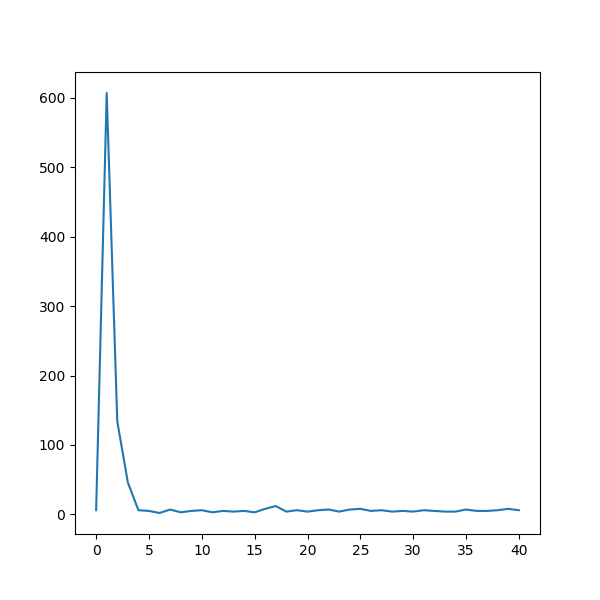

In [30]:
fig = plt.figure(figsize=FGsize)
plt.plot(n)
plt.show()

In [32]:
MasterList = VOIDS

#################################################################
#                                                               #
#                Store the Void Masterlist                      #
#                                                               #
#################################################################

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

Xv = void_cat[:,0]
Yv = void_cat[:,1]
Zv = void_cat[:,2]


<IPython.core.display.Javascript object>


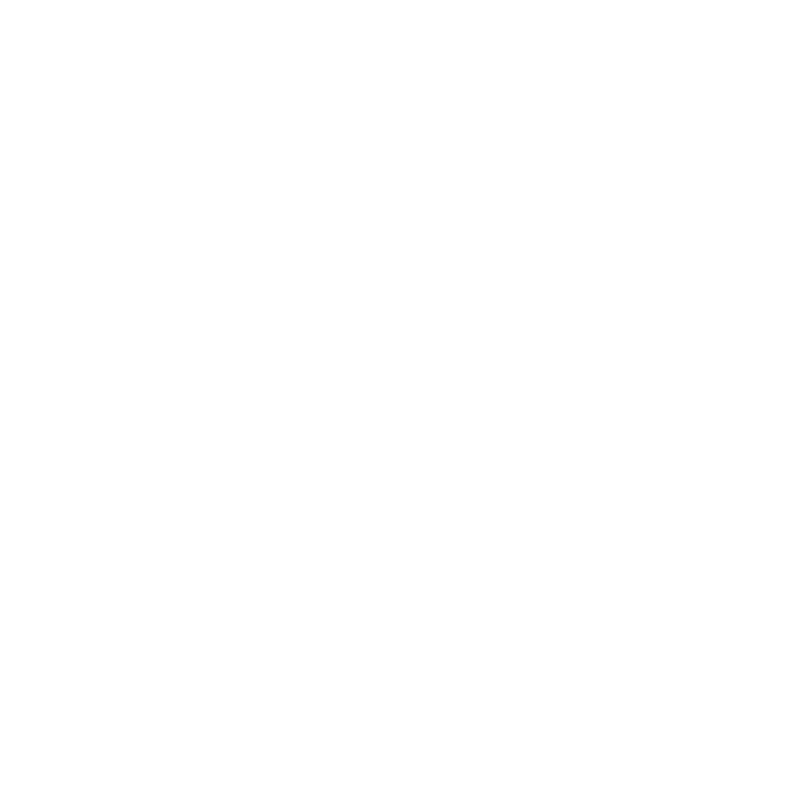

<IPython.core.display.Javascript object>


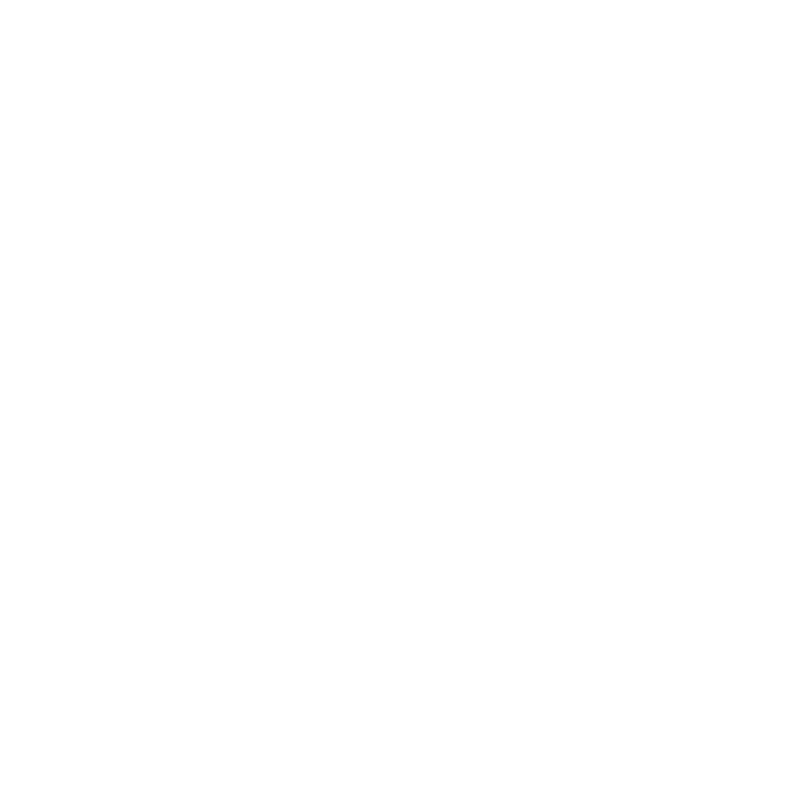

<IPython.core.display.Javascript object>


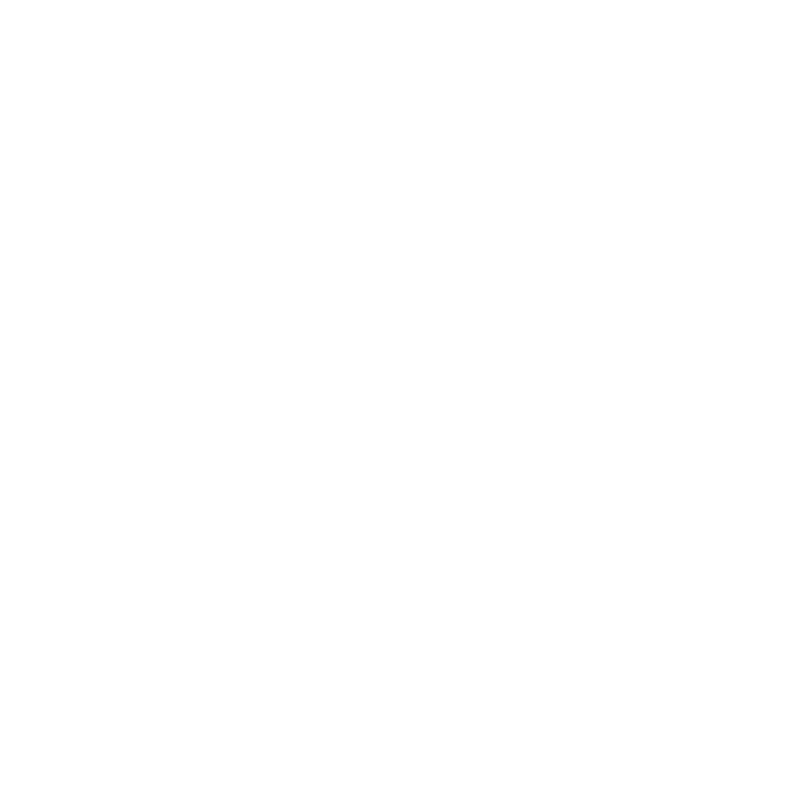

<IPython.core.display.Javascript object>


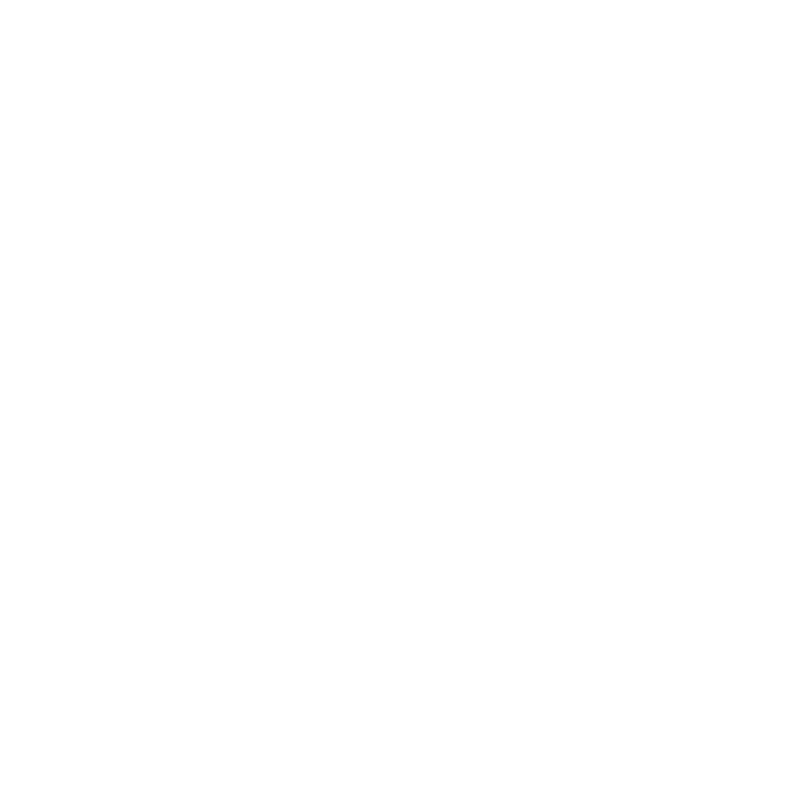

<IPython.core.display.Javascript object>


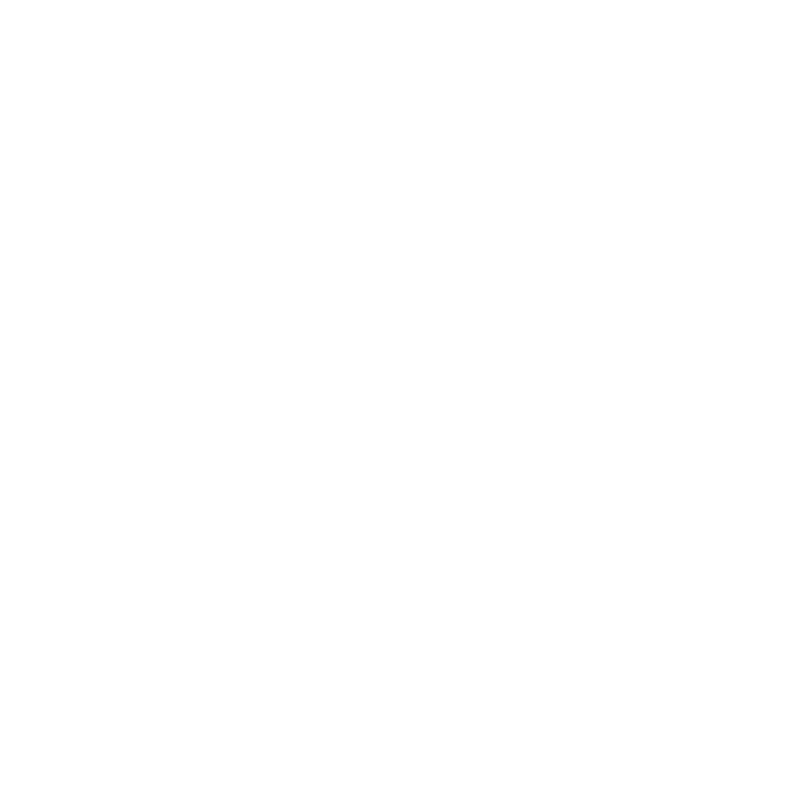

<IPython.core.display.Javascript object>


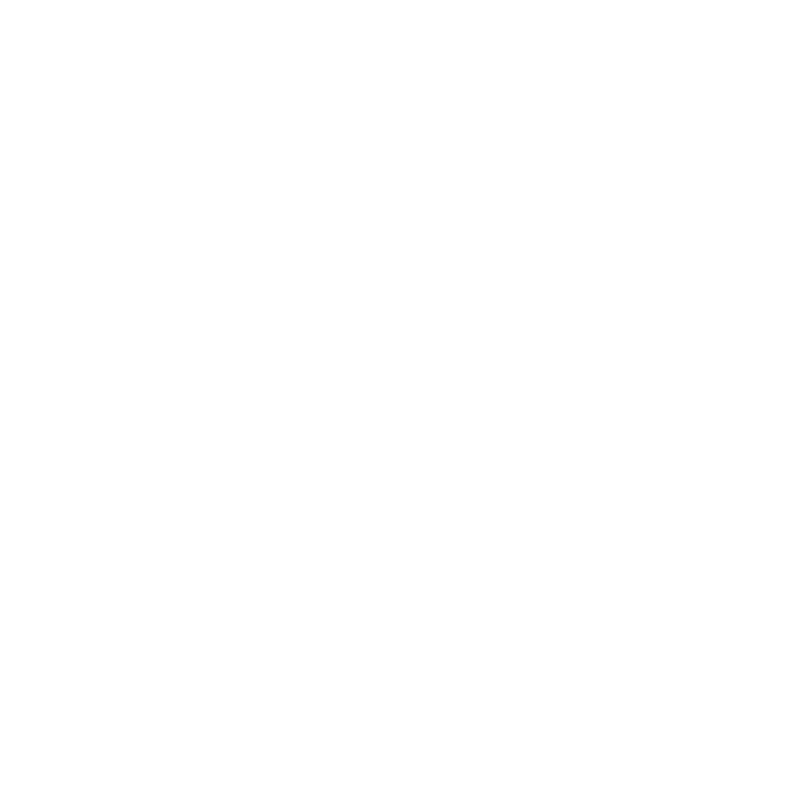

<IPython.core.display.Javascript object>


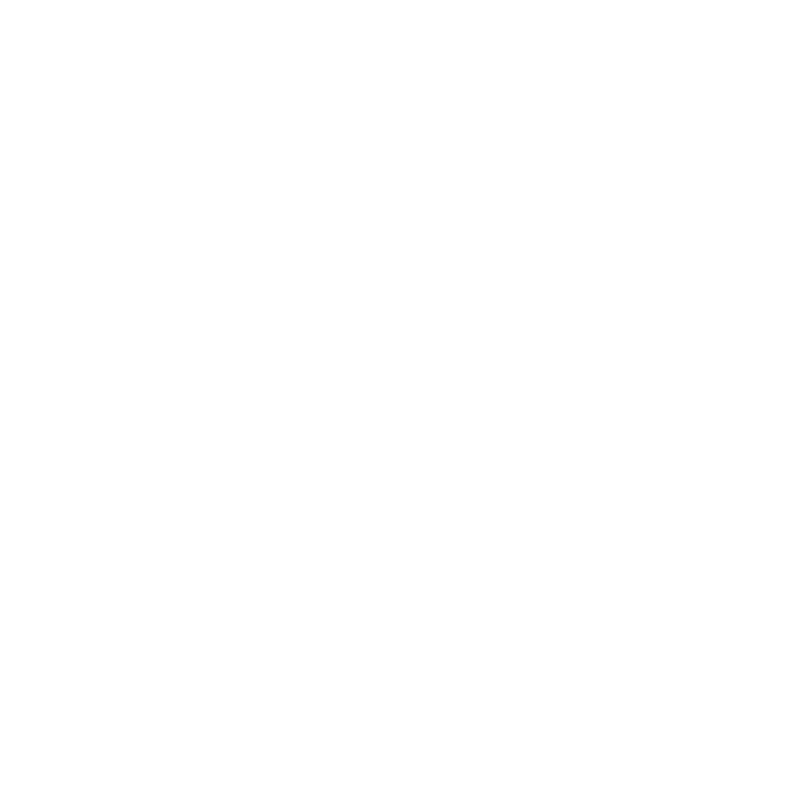

<IPython.core.display.Javascript object>


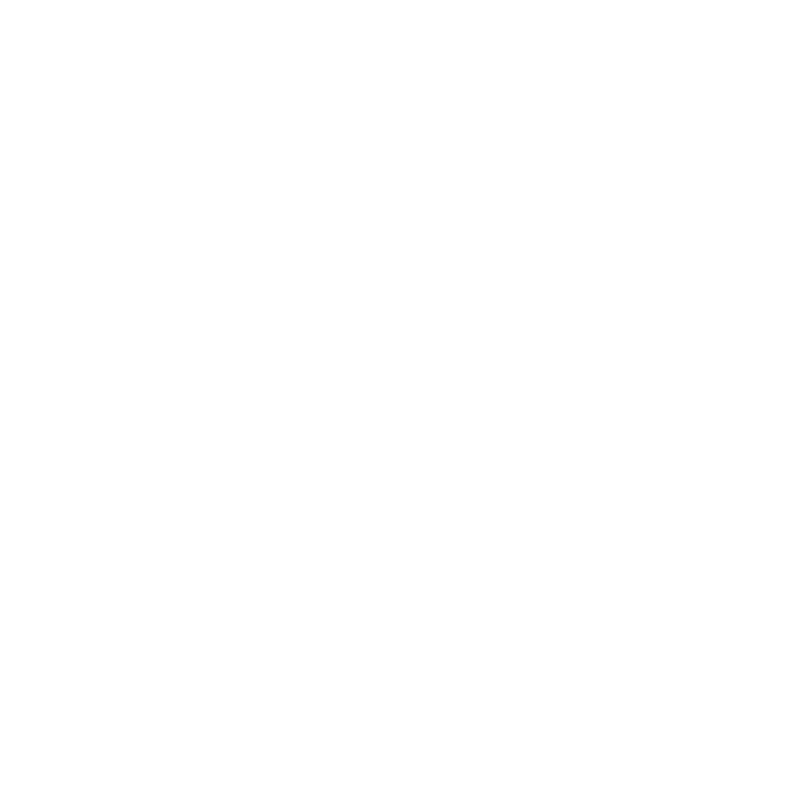

<IPython.core.display.Javascript object>


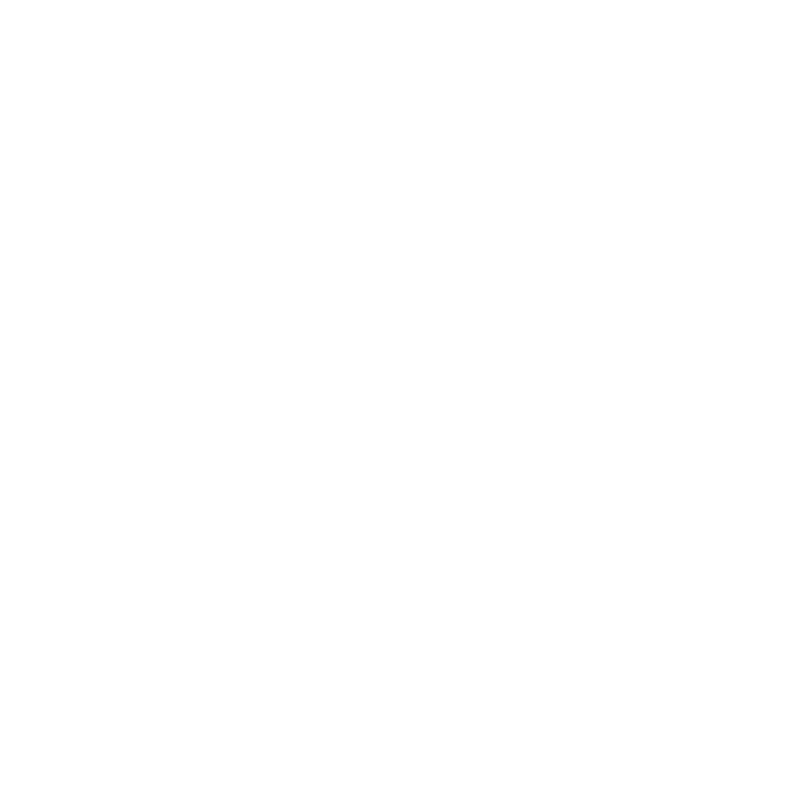

<IPython.core.display.Javascript object>


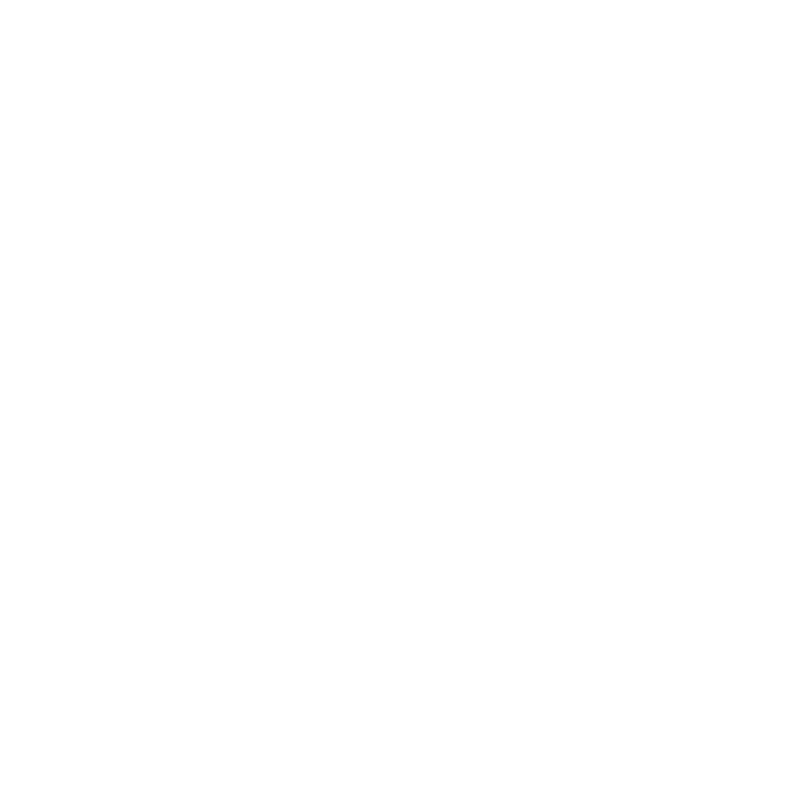

<IPython.core.display.Javascript object>


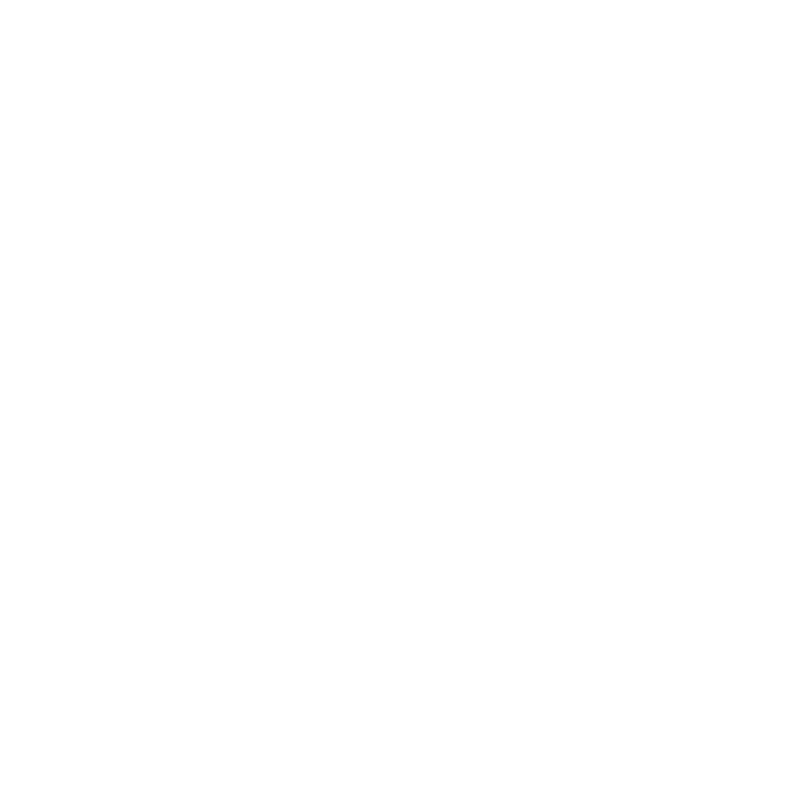

<IPython.core.display.Javascript object>


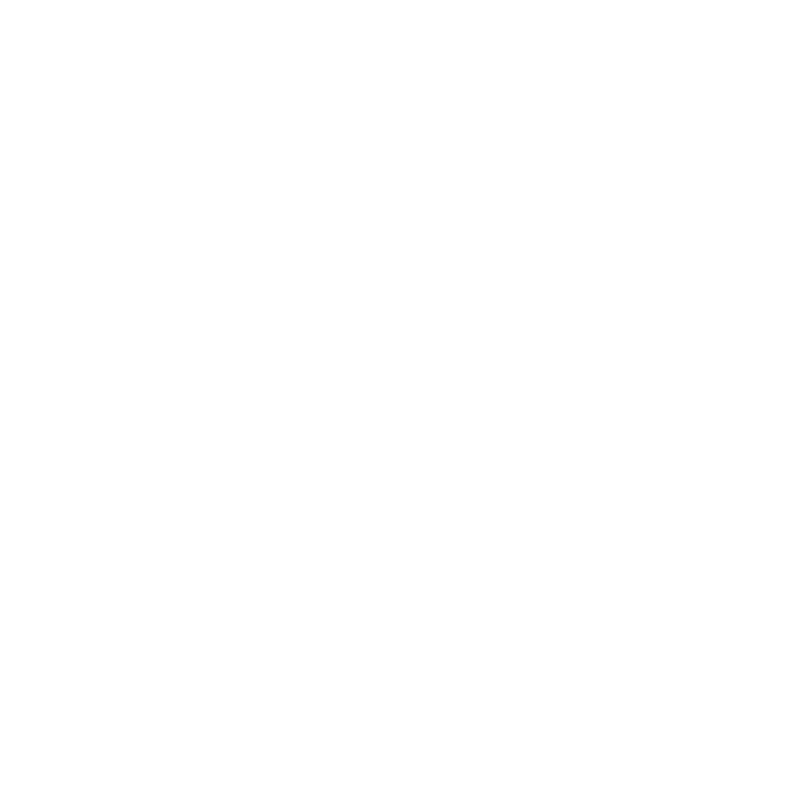

<IPython.core.display.Javascript object>


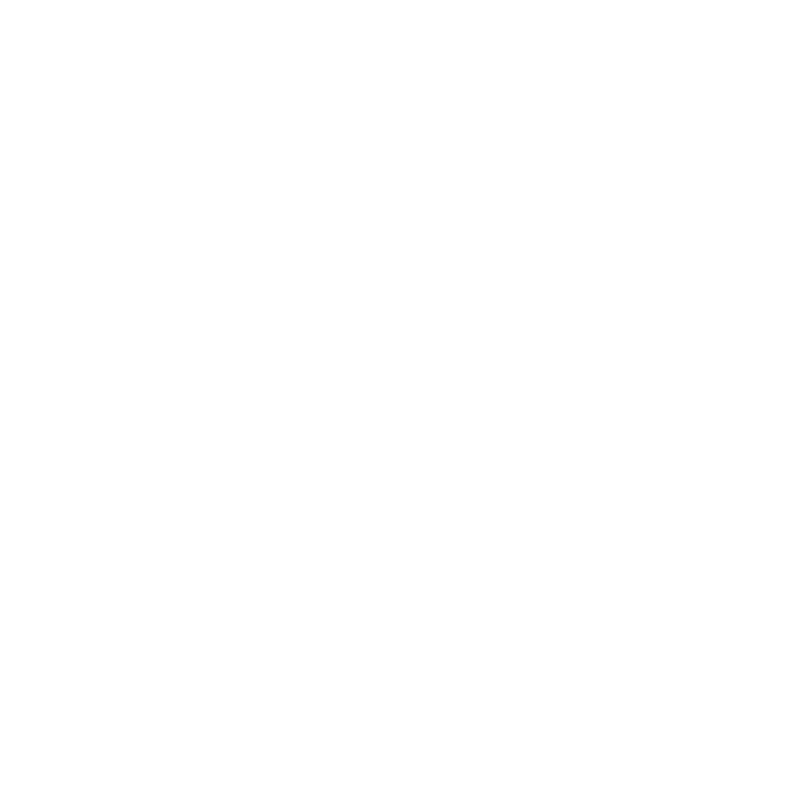

<IPython.core.display.Javascript object>


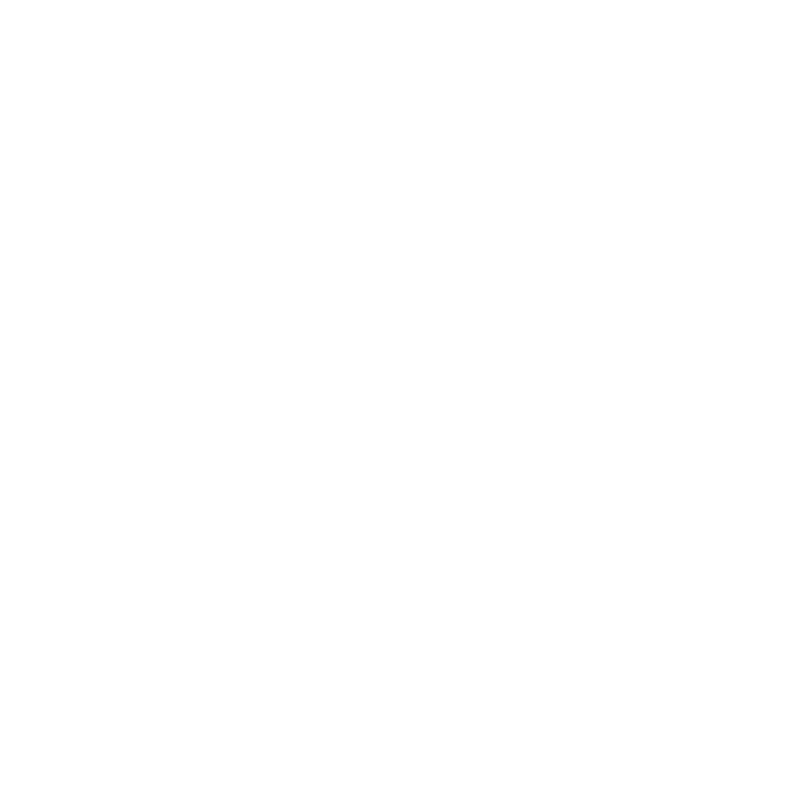

<IPython.core.display.Javascript object>


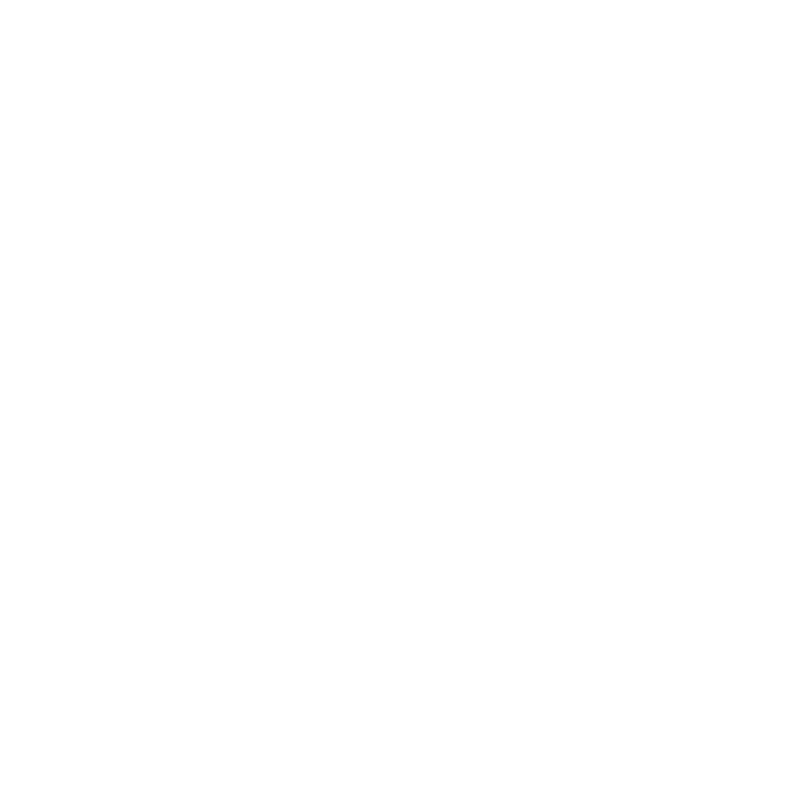

<IPython.core.display.Javascript object>


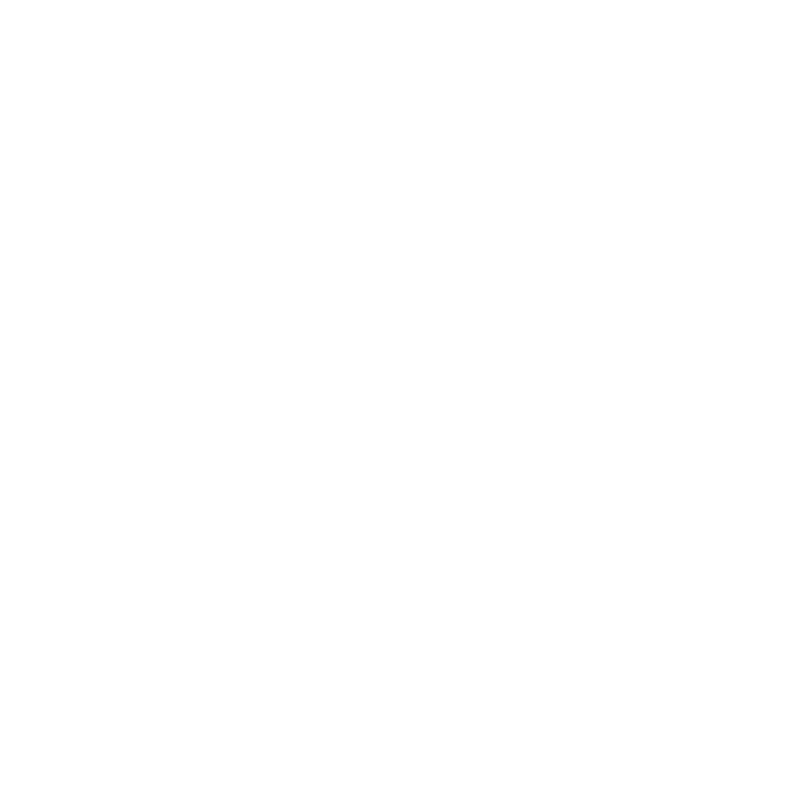

<IPython.core.display.Javascript object>


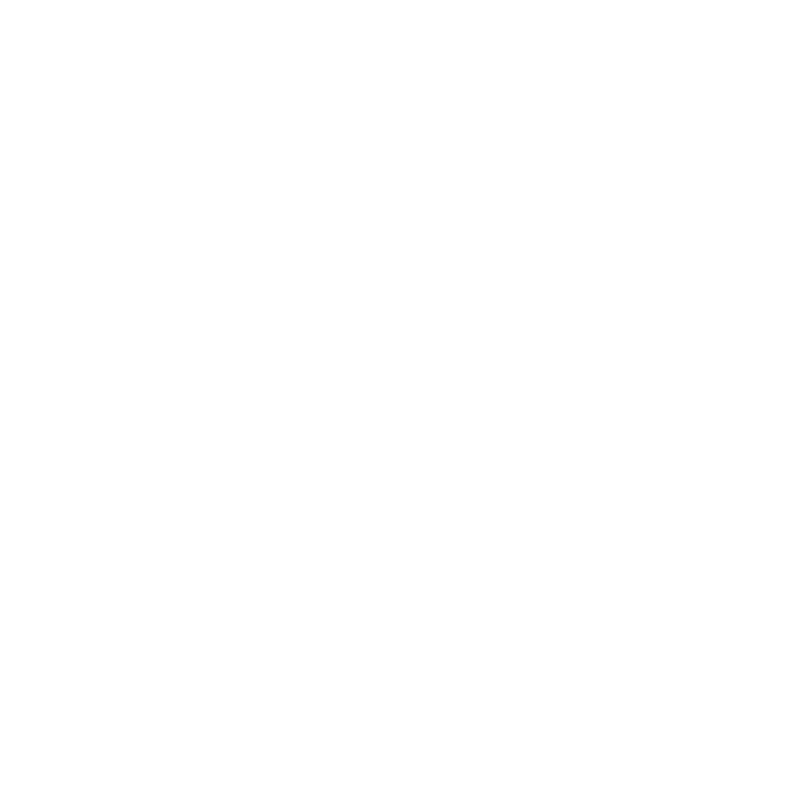

<IPython.core.display.Javascript object>


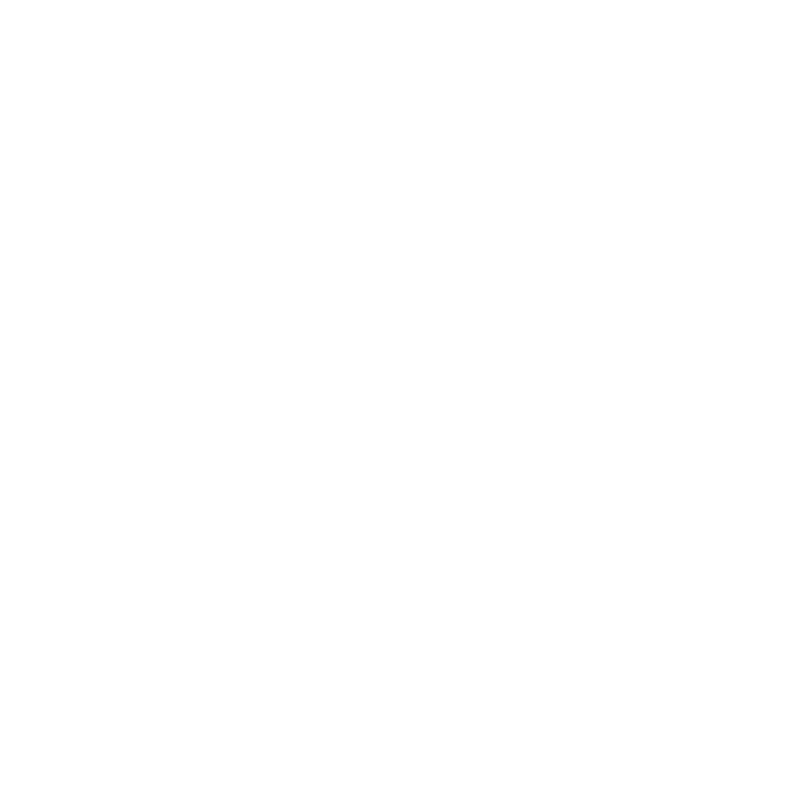

<IPython.core.display.Javascript object>


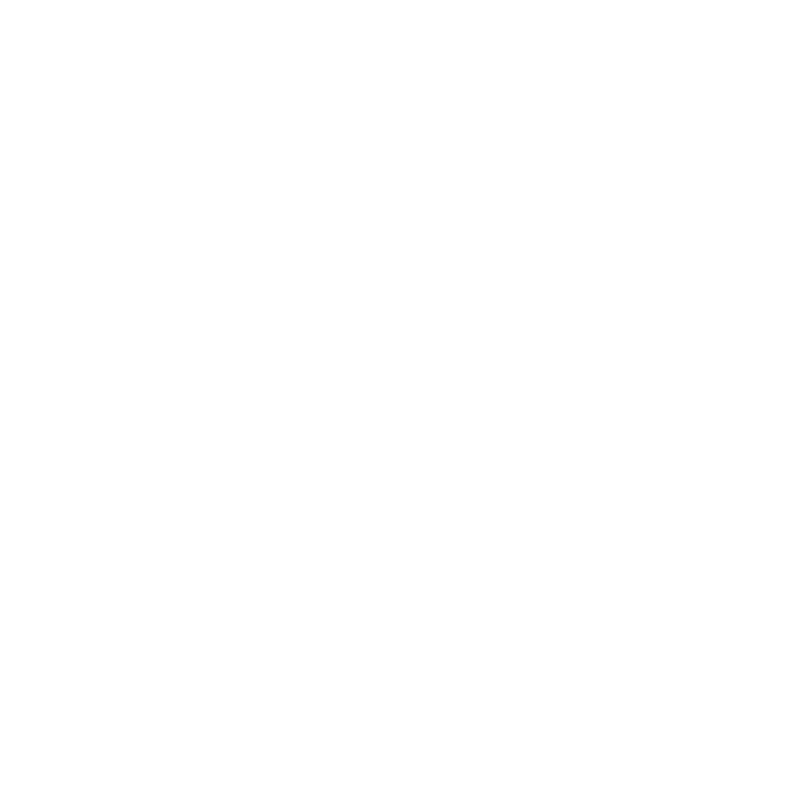

<IPython.core.display.Javascript object>


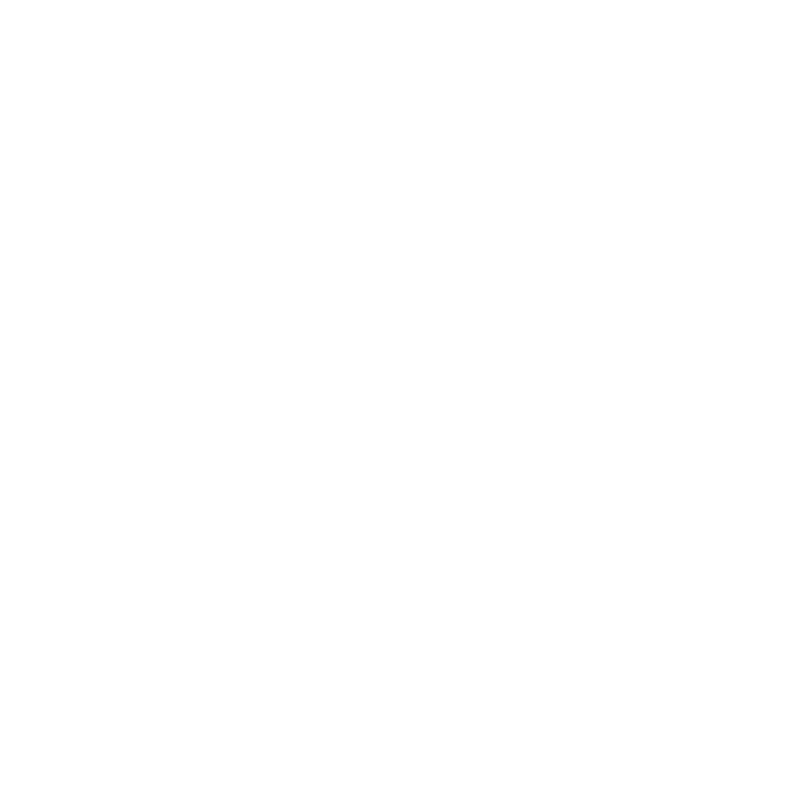

<IPython.core.display.Javascript object>


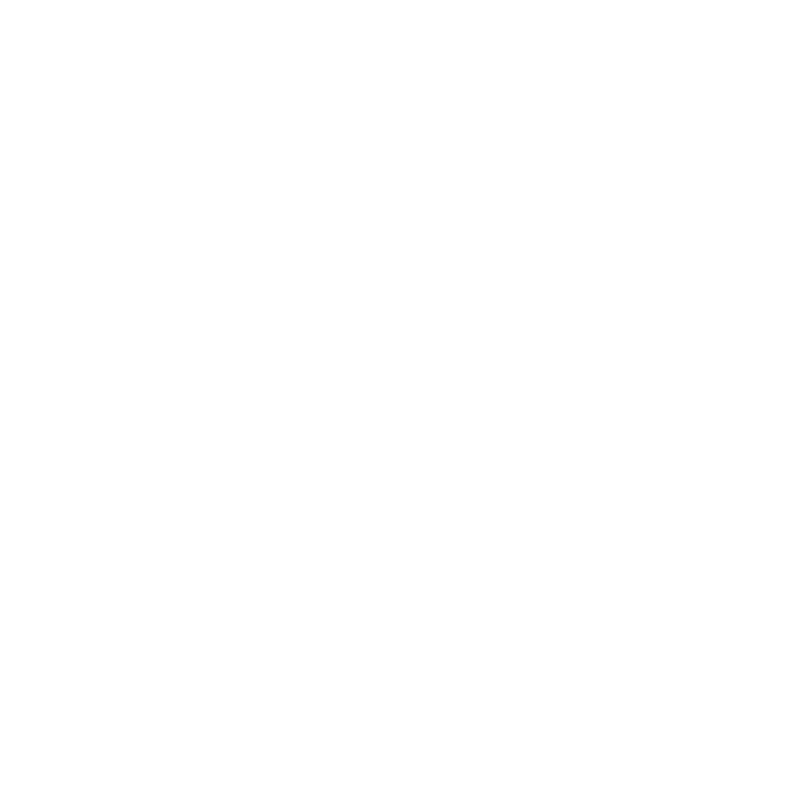

<IPython.core.display.Javascript object>


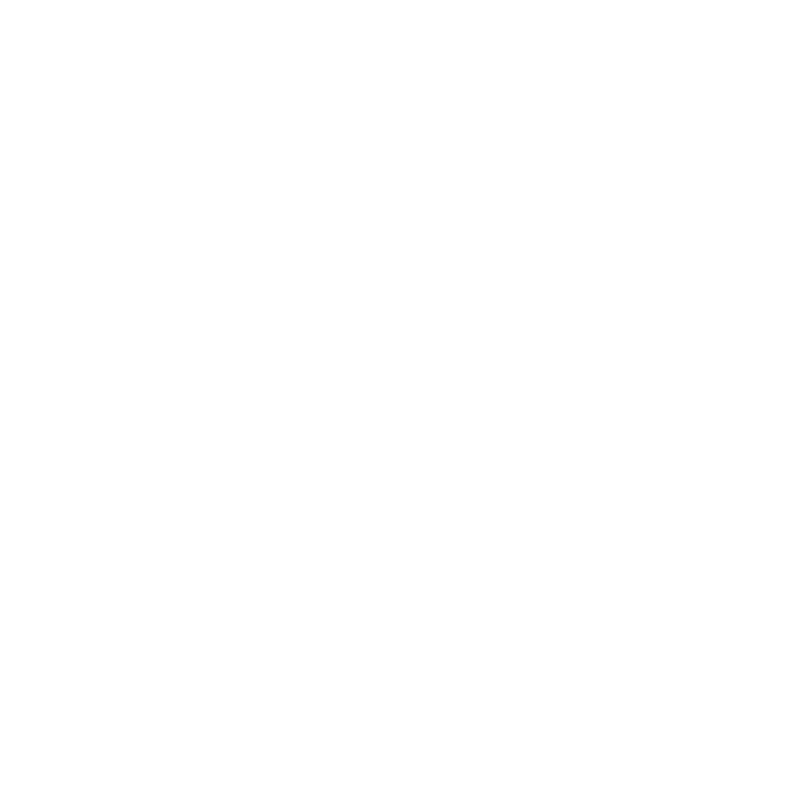

<IPython.core.display.Javascript object>


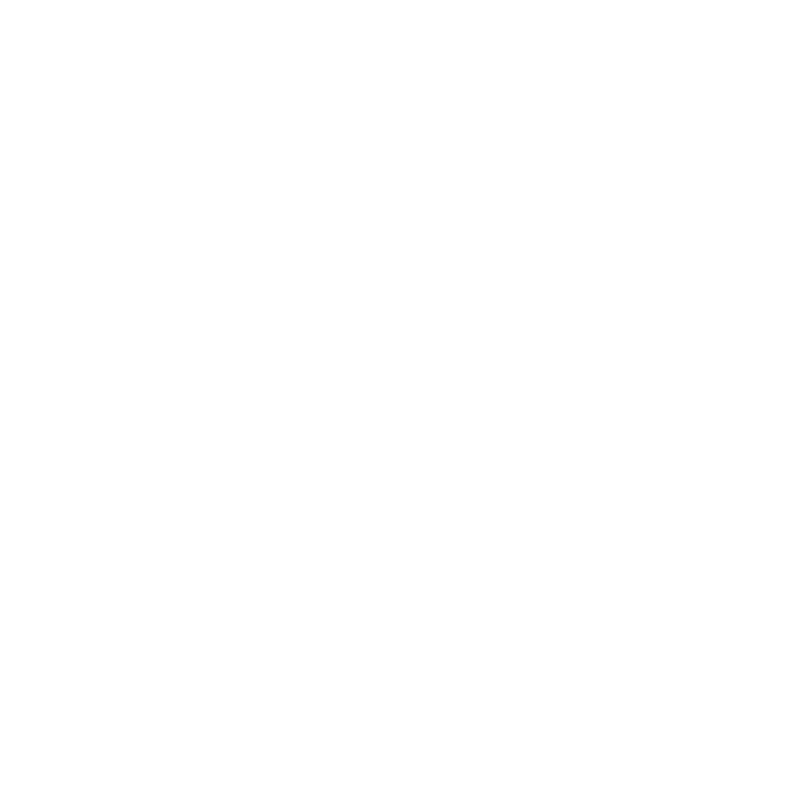

<IPython.core.display.Javascript object>


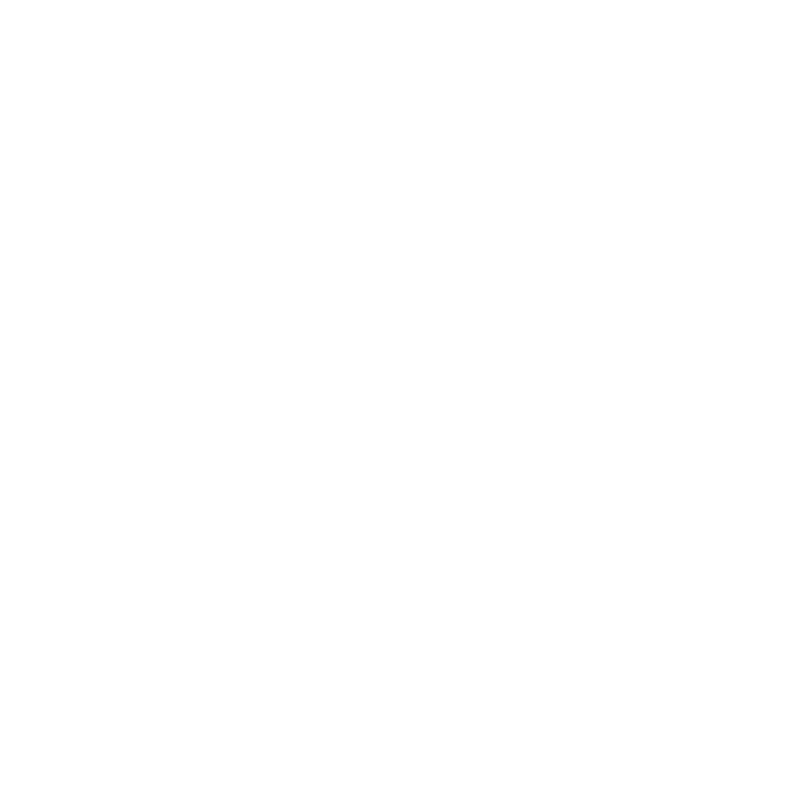

<IPython.core.display.Javascript object>


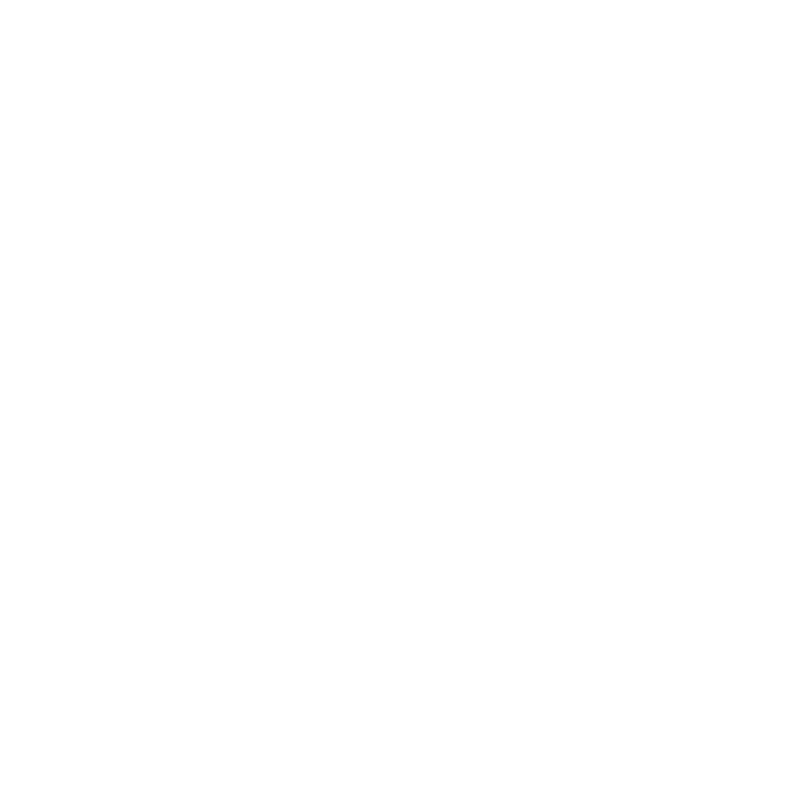

<IPython.core.display.Javascript object>


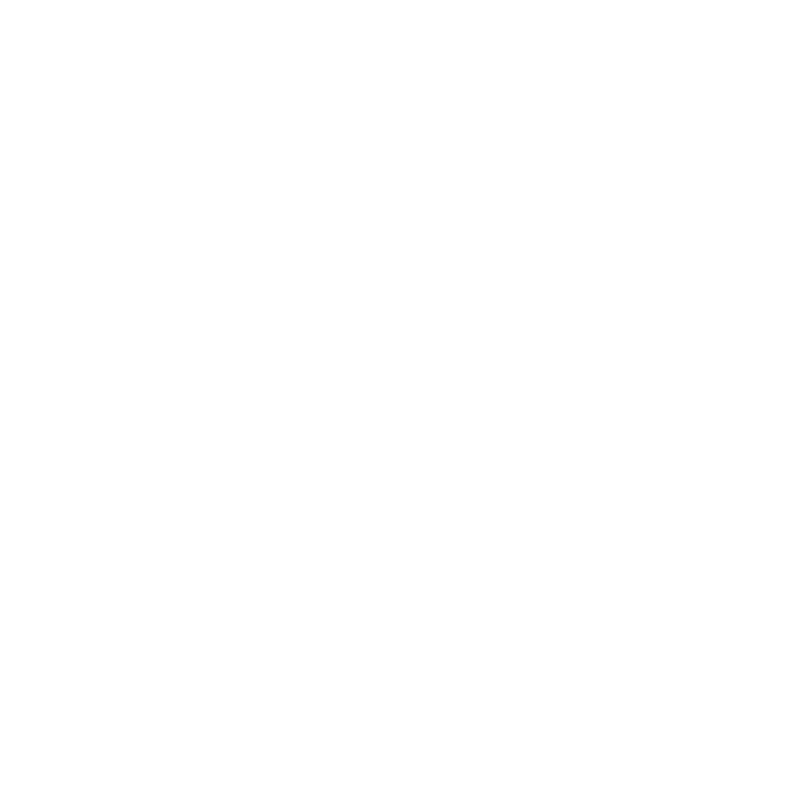

<IPython.core.display.Javascript object>


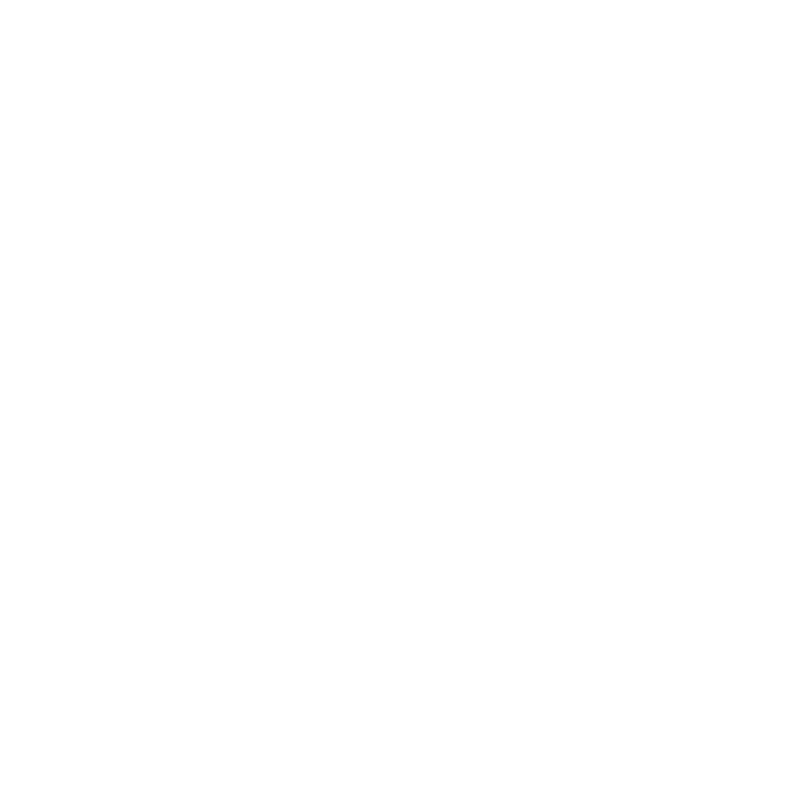

<IPython.core.display.Javascript object>


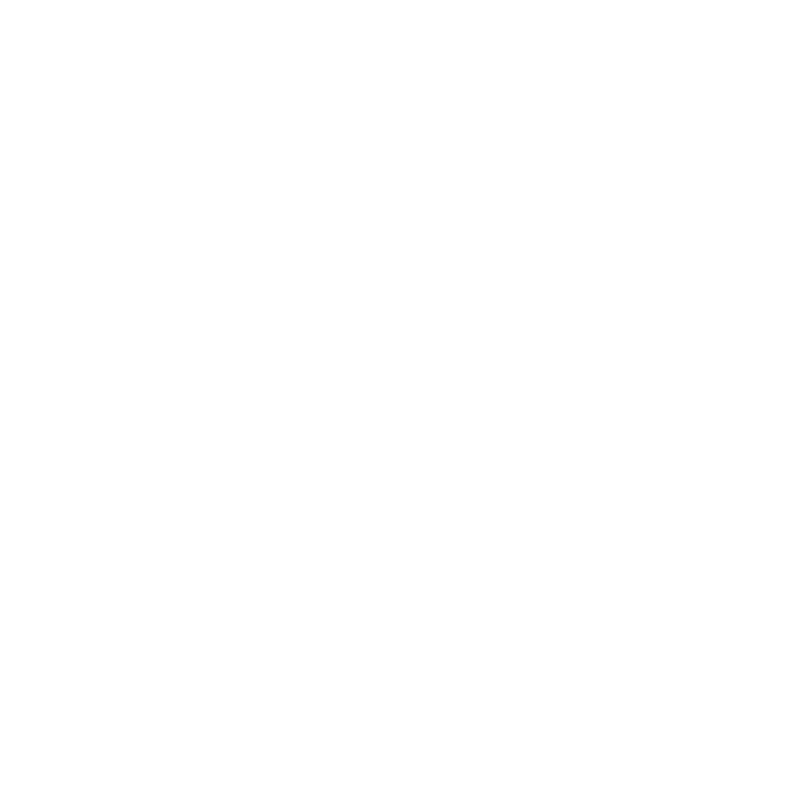

<IPython.core.display.Javascript object>


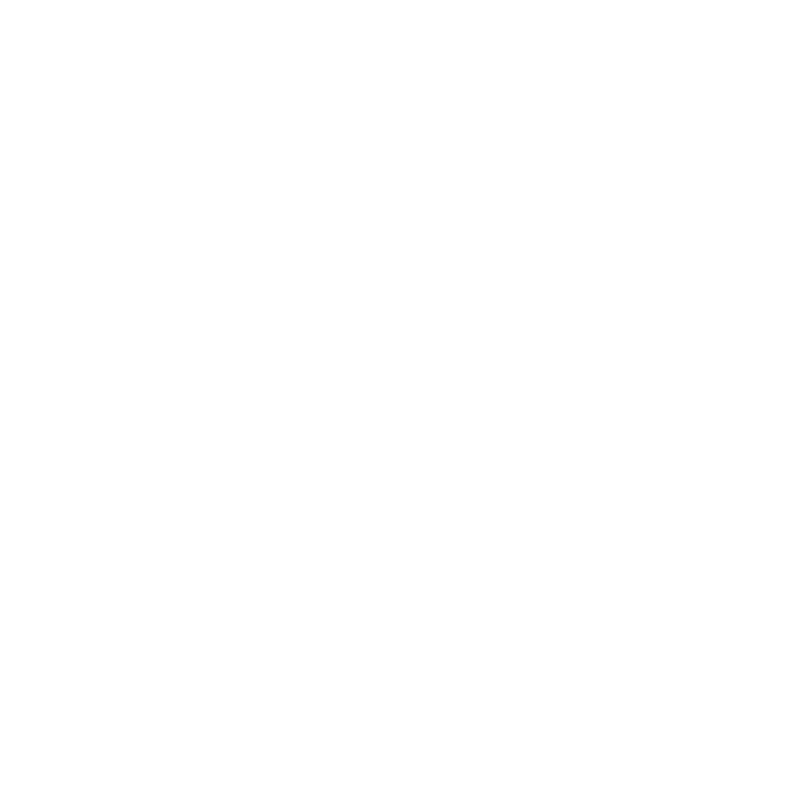

<IPython.core.display.Javascript object>


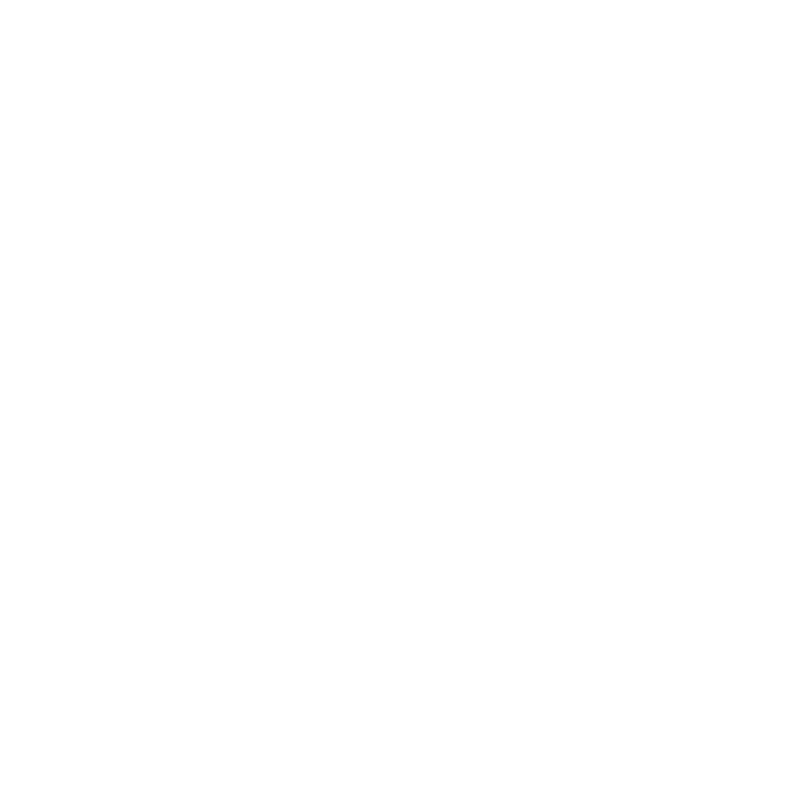

<IPython.core.display.Javascript object>


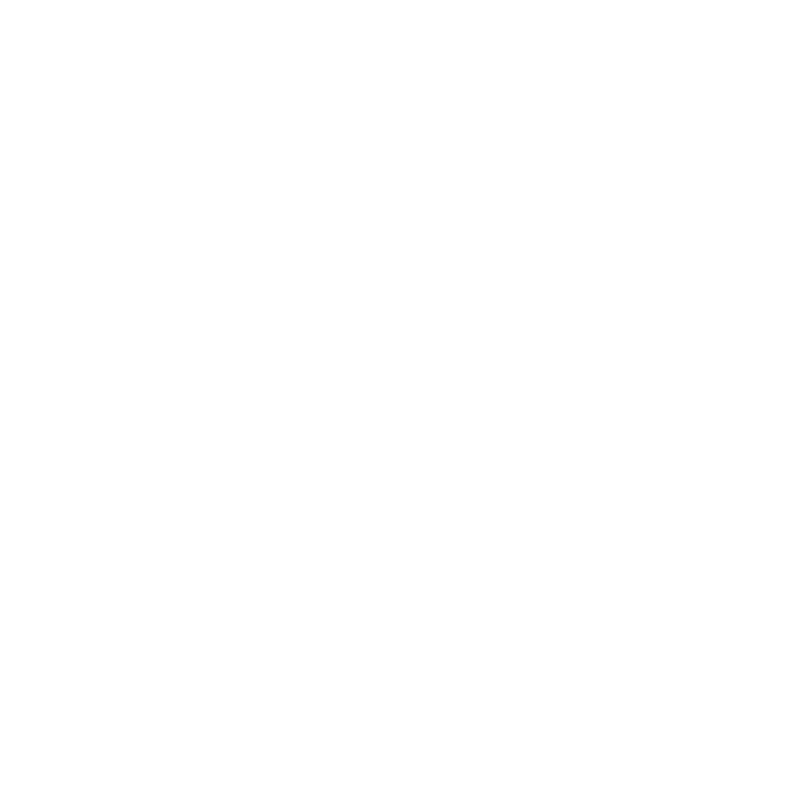

<IPython.core.display.Javascript object>


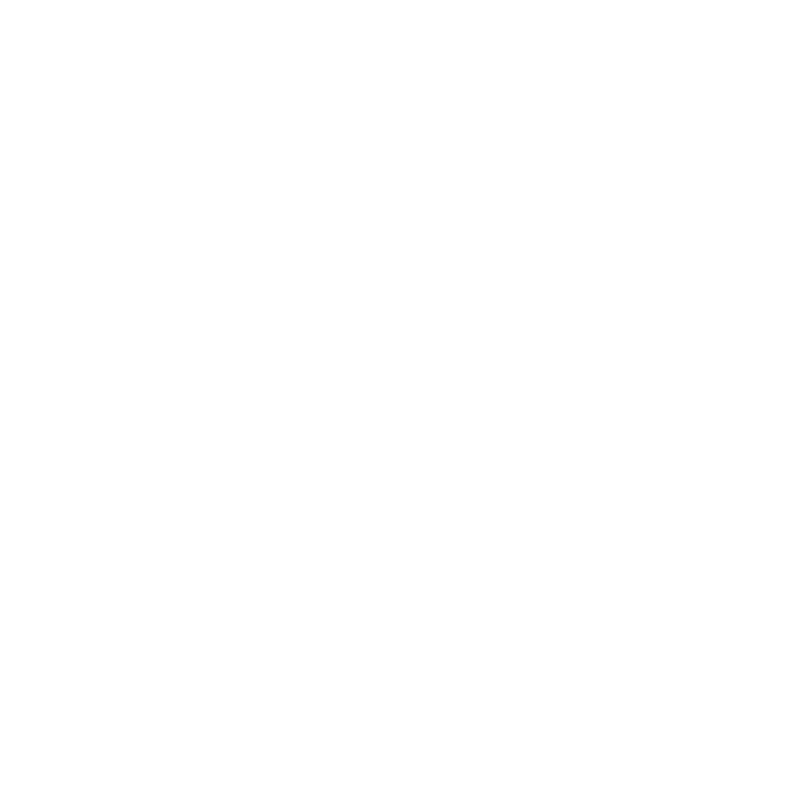

<IPython.core.display.Javascript object>


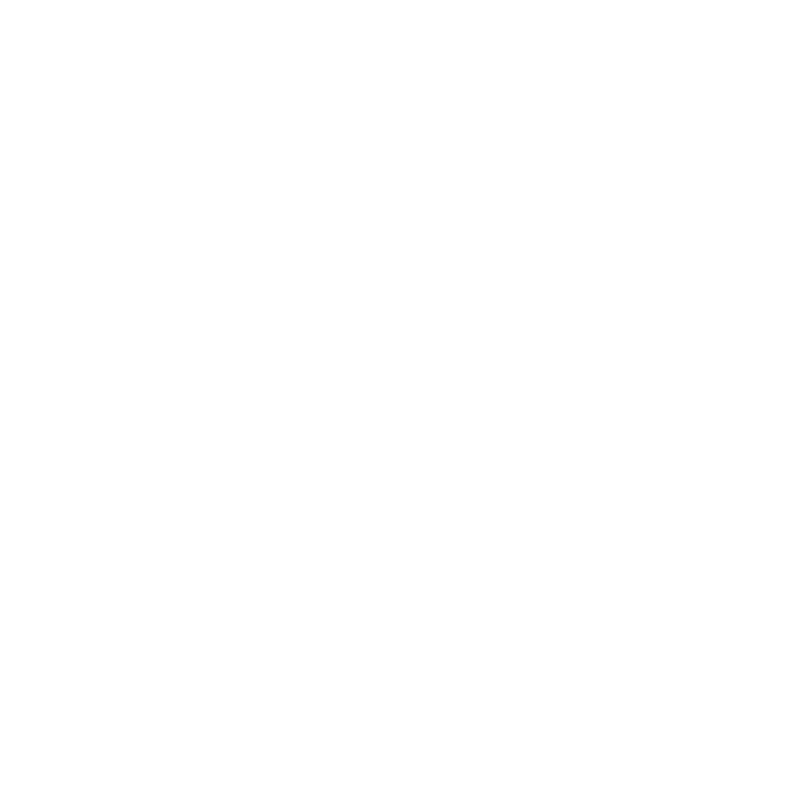

<IPython.core.display.Javascript object>


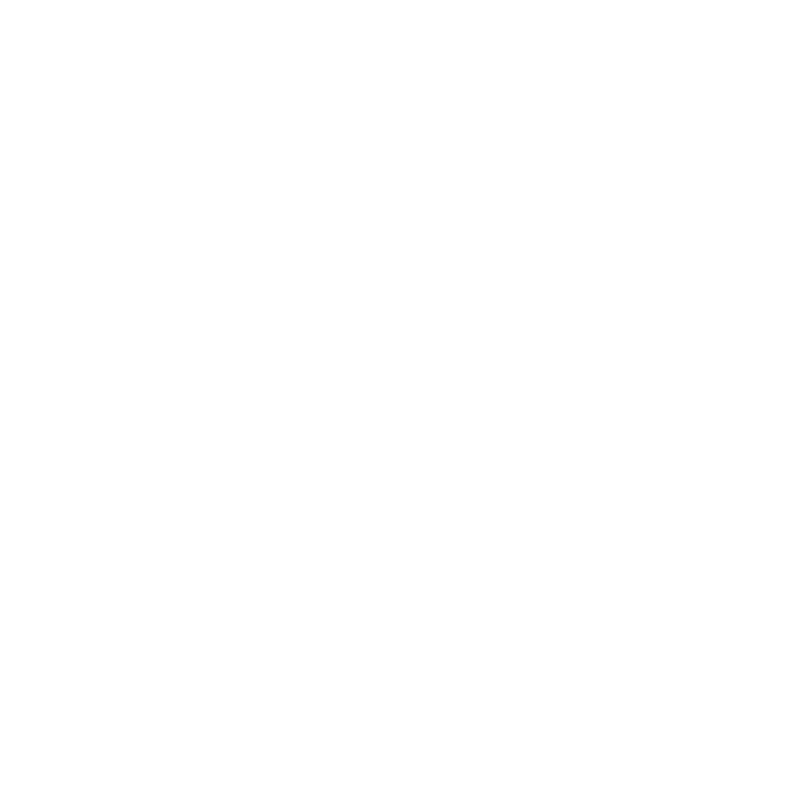

<IPython.core.display.Javascript object>


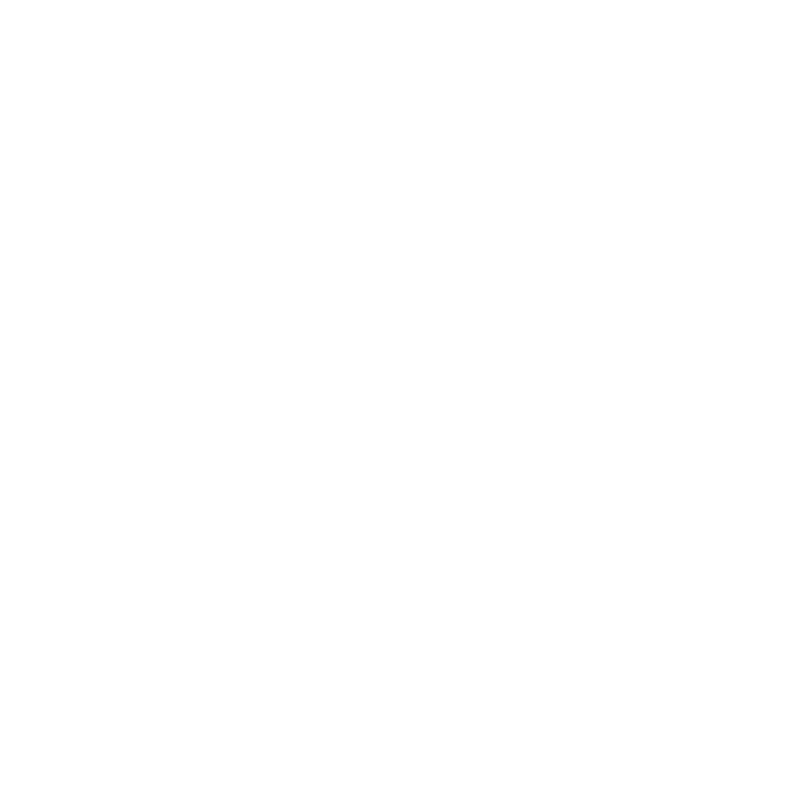

<IPython.core.display.Javascript object>


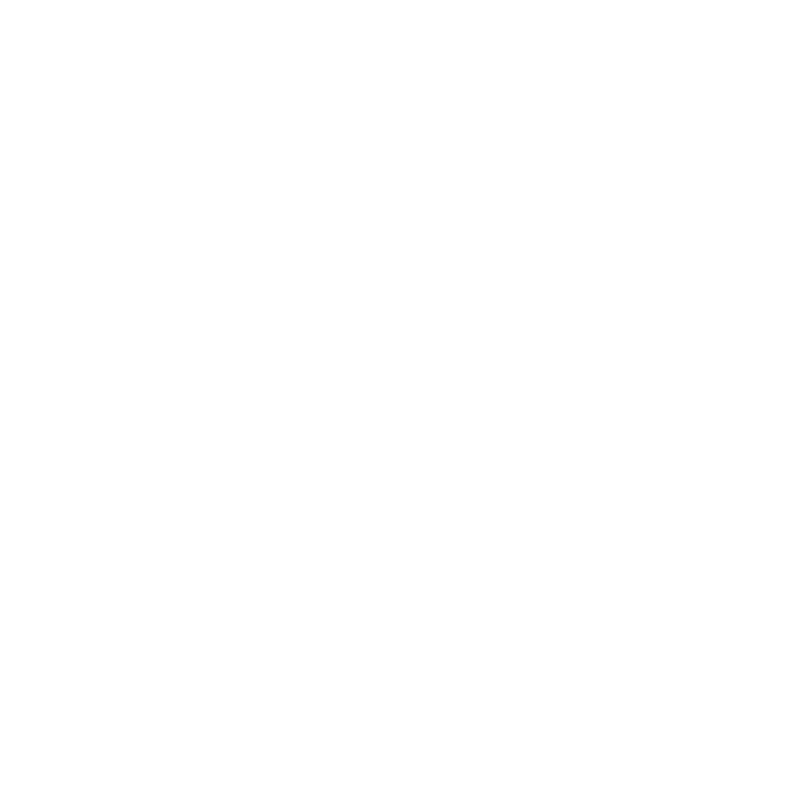

<IPython.core.display.Javascript object>


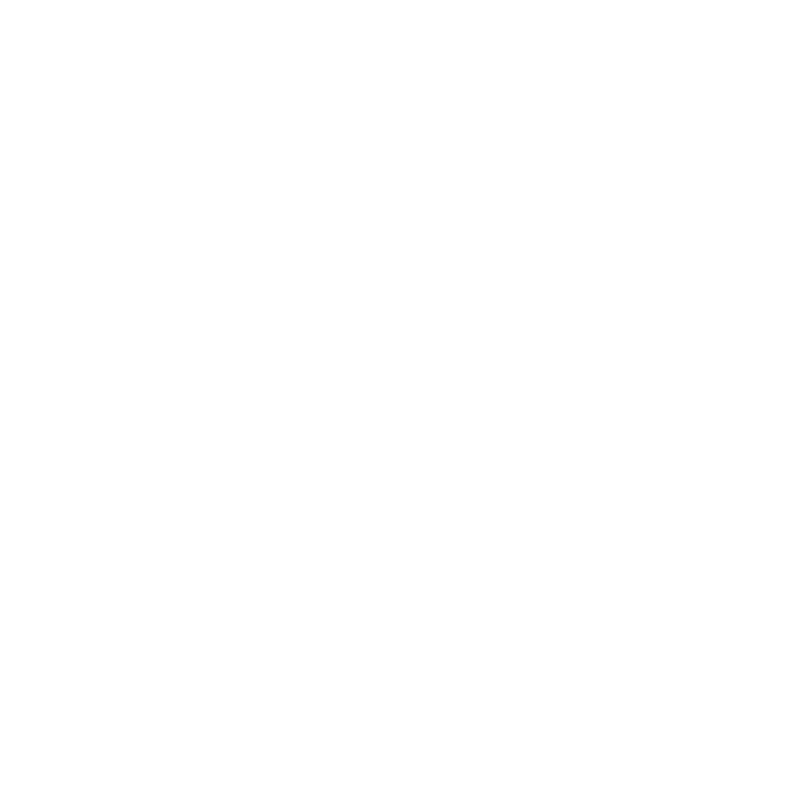

<IPython.core.display.Javascript object>


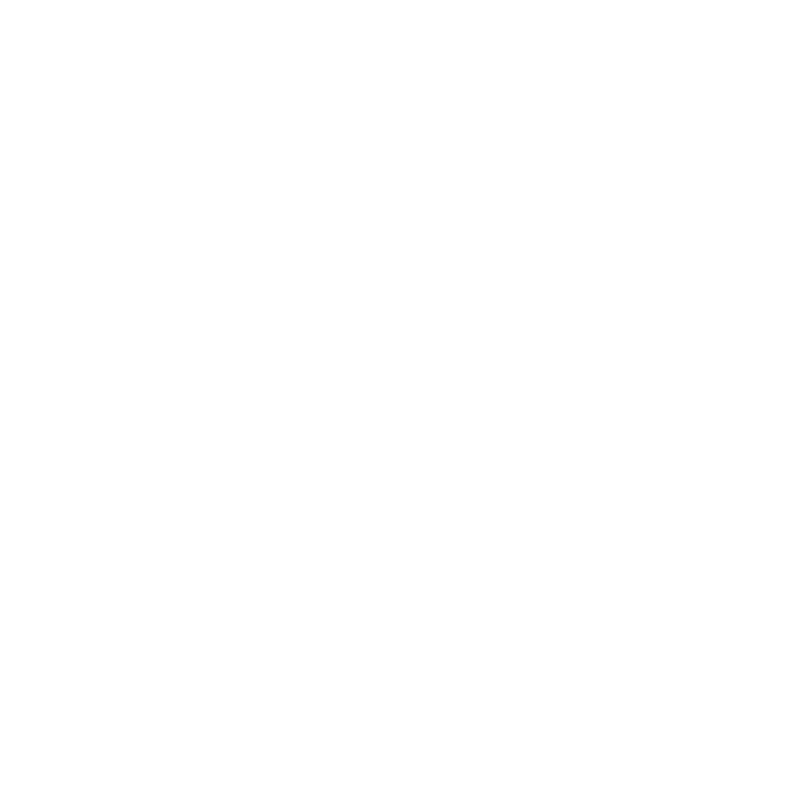

<IPython.core.display.Javascript object>


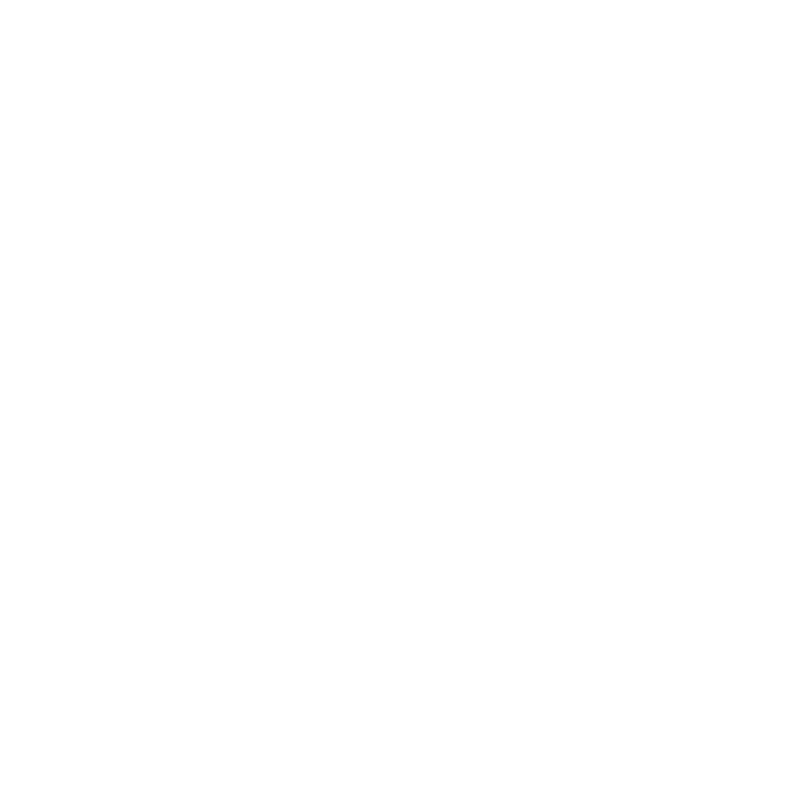

<IPython.core.display.Javascript object>


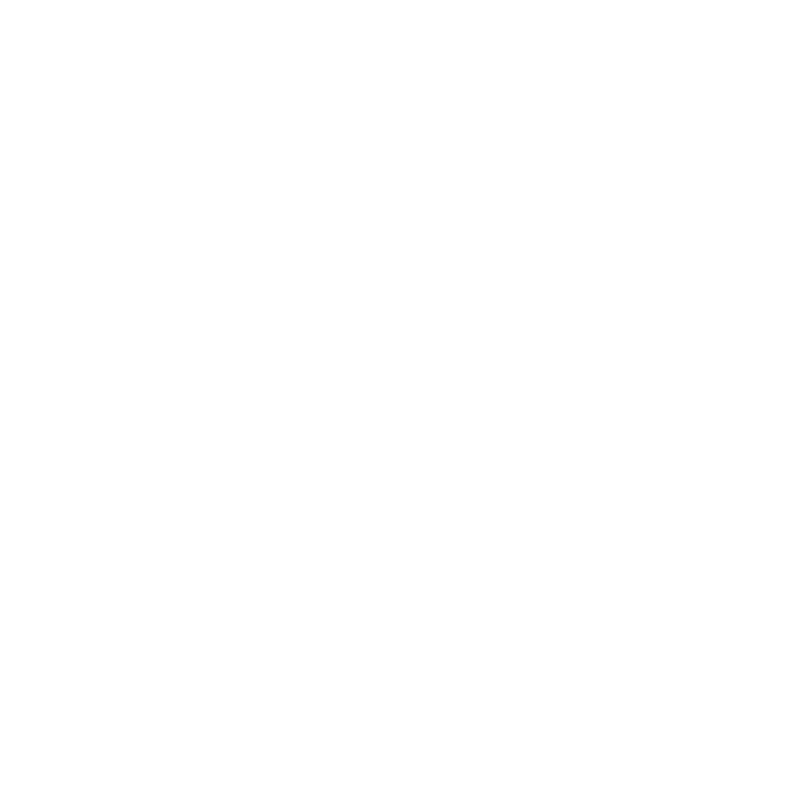

<IPython.core.display.Javascript object>


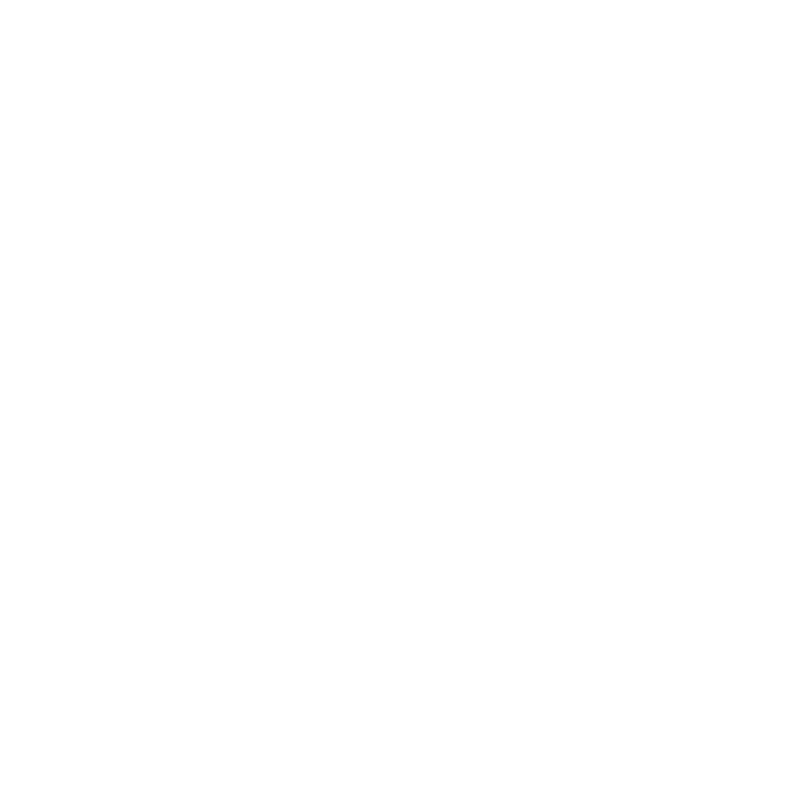

In [47]:
MLlen = len(MasterList)




for i in range(MLlen):
    Void = MasterList[i]
    N = len(Void)

    if(N>1): # at least 8 particles per void

        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        
        ax.quiver(0,0,0,100,0,0, length=0.3)
        ax.quiver(0,0,0,0,100,0, length=0.3)
        ax.quiver(0,0,0,0,0,100, length=0.3)
        
        
        
        
        colorin = i * np.ones(N)
        ax.scatter(Xv, Yv, Zv, c="green", s=10, alpha=0.5, label="True Void Points")
        ax.scatter(X[Void], Y[Void], Z[Void], cmap=cmap.gist_ncar)
        ax.set_xlim(0,100)
        ax.set_ylim(0,100)
        ax.set_zlim(0,100)
        plt.savefig( FG_path+"recursion2_{}.png".format(i))
        plt.close()
    

In [34]:
MLlen

41

In [36]:
for void in MasterList:
    print(len(void))

6
607
134
46
6
5
2
7
3
5
6
3
5
4
5
3
8
12
4
6
4
6
7
4
7
8
5
6
4
5
4
6
5
4
4
7
5
5
6
8
6
